### Step 1 : Import all the libraries :

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import PowerTransformer
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, auc, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

Set max rows and columns : 

In [3]:
pd.set_option('max_columns', 1000)
pd.set_option('max_rows', 1000)

Load the file into a dataframe : 

In [4]:
data = pd.read_csv('telecom_churn_data.csv', parse_dates = True)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Check info :

In [5]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

Converting all date fields into DateTime format:

In [6]:
data['last_date_of_month_6'] = pd.to_datetime(data['last_date_of_month_6'], format = '%m/%d/%Y')
data['last_date_of_month_7'] = pd.to_datetime(data['last_date_of_month_7'], format = '%m/%d/%Y')
data['last_date_of_month_8'] = pd.to_datetime(data['last_date_of_month_8'], format = '%m/%d/%Y')
data['last_date_of_month_9'] = pd.to_datetime(data['last_date_of_month_9'], format = '%m/%d/%Y')

data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6'], format = '%m/%d/%Y')
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7'], format = '%m/%d/%Y')
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8'], format = '%m/%d/%Y')
data['date_of_last_rech_9'] = pd.to_datetime(data['date_of_last_rech_9'], format = '%m/%d/%Y')

data['date_of_last_rech_data_6'] = pd.to_datetime(data['date_of_last_rech_data_6'], format = '%m/%d/%Y')
data['date_of_last_rech_data_7'] = pd.to_datetime(data['date_of_last_rech_data_7'], format = '%m/%d/%Y')
data['date_of_last_rech_data_8'] = pd.to_datetime(data['date_of_last_rech_data_8'], format = '%m/%d/%Y')
data['date_of_last_rech_data_9'] = pd.to_datetime(data['date_of_last_rech_data_9'], format = '%m/%d/%Y')

Rechecking info:

In [7]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   mobile_number             int64         
 1   circle_id                 int64         
 2   loc_og_t2o_mou            float64       
 3   std_og_t2o_mou            float64       
 4   loc_ic_t2o_mou            float64       
 5   last_date_of_month_6      datetime64[ns]
 6   last_date_of_month_7      datetime64[ns]
 7   last_date_of_month_8      datetime64[ns]
 8   last_date_of_month_9      datetime64[ns]
 9   arpu_6                    float64       
 10  arpu_7                    float64       
 11  arpu_8                    float64       
 12  arpu_9                    float64       
 13  onnet_mou_6               float64       
 14  onnet_mou_7               float64       
 15  onnet_mou_8               float64       
 16  onnet_mou_9               float64       
 17  offnet_mou_

Check shape : 

In [8]:
data.shape

(99999, 226)

Describe dataframe : 

In [9]:
data.describe(percentiles = [0.25,0.5,0.75,0.9,0.95,0.99])

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
90%     7.002174e+09      109.0             0.0             0.0   
95%     7.002291e+09      109.0             0.0             0.0   
99%     7.002387e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
90%               0.0    620.075400    617.252000    618.160400    601.537000   
95%               0.0    829.488200    828.357200    833.303300    805.107200   
99%               0.0   1410.792540   1428.685880   1455.539960   1402.445660   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
90%      344.102000    348.035000    345.030000    342.890000    477.325000   
95%      612.407500    624.835500    620.690000    617.232500    727.879000   
99%     1431.760500   1478.533300   1480.334000   1445.766400   1539.535800   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
90%      480.431000    486.310000    471.031000      11.810000       5.060000   
95%      744.225000    734.860000    720.120500      40.640000      23.140000   
99%     1549.379500   1530.398000   1521.328700     219.847000     154.483200   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.00

Identifying id, numerical, categorical and date features : 

Features with less than 30 unique values are considered as categorical.

In [10]:
date_columns = list(data.filter(regex='date').columns)
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [11]:
feature_split = pd.DataFrame(data.nunique())
feature_split.reset_index(inplace = True)
feature_split.columns = ['Feature','Unique count']
feature_split

Feature  Unique count
0               mobile_number         99999
1                   circle_id             1
2              loc_og_t2o_mou             1
3              std_og_t2o_mou             1
4              loc_ic_t2o_mou             1
5        last_date_of_month_6             1
6        last_date_of_month_7             1
7        last_date_of_month_8             1
8        last_date_of_month_9             1
9                      arpu_6         85681
10                     arpu_7         85308
11                     arpu_8         83615
12                     arpu_9         79937
13                onnet_mou_6         24313
14                onnet_mou_7         24336
15                onnet_mou_8         24089
16                onnet_mou_9         23565
17               offnet_mou_6         31140
18               offnet_mou_7         31023
19               offnet_mou_8         30908
20               offnet_mou_9         30077
21              roam_ic_mou_6          6512
22              roam_ic_mou_7          5230
23              roam_ic_mou_8          5315
24              roam_ic_mou_9          4827
25              roam_og_mou_6          8038
26              roam_og_mou_7          6639
27              roam_og_mou_8          6504
28              roam_og_mou_9          5882
29           loc_og_t2t_mou_6         13539
30           loc_og_t2t_mou_7         13411
31           loc_og_t2t_mou_8         13336
32           loc_og_t2t_mou_9         12949
33           loc_og_t2m_mou_6         20905
34           loc_og_t2m_mou_7         20637
35           loc_og_t2m_mou_8         20544
36           loc_og_t2m_mou_9         20141
37           loc_og_t2f_mou_6          3860
38           loc_og_t2f_mou_7          3863
39           loc_og_t2f_mou_8          3807
40           loc_og_t2f_mou_9          3758
41           loc_og_t2c_mou_6          2235
42           loc_og_t2c_mou_7          2426
43           loc_og_t2c_mou_8          2516
44           loc_og_t2c_mou_9          2332
45               loc_og_mou_6         26372
46               loc_og_mou_7         26091
47               loc_og_mou_8         25990
48               loc_og_mou_9         25376
49           std_og_t2t_mou_6         18244
50           std_og_t2t_mou_7         18567
51           std_og_t2t_mou_8         18291
52           std_og_t2t_mou_9         17934
53           std_og_t2m_mou_6         19734
54           std_og_t2m_mou_7         20018
55           std_og_t2m_mou_8         19786
56           std_og_t2m_mou_9         19052
57           std_og_t2f_mou_6          2450
58           std_og_t2f_mou_7          2391
59           std_og_t2f_mou_8          2333
60           std_og_t2f_mou_9          2295
61           std_og_t2c_mou_6             1
62           std_og_t2c_mou_7             1
63           std_og_t2c_mou_8             1
64           std_og_t2c_mou_9             1
65               std_og_mou_6         27502
66               std_og_mou_7         27951
67               std_og_mou_8         27491
68               std_og_mou_9         26553
69               isd_og_mou_6          1381
70               isd_og_mou_7          1380
71               isd_og_mou_8          1276
72               isd_og_mou_9          1255
73               spl_og_mou_6          3965
74               spl_og_mou_7          4396
75               spl_og_mou_8          4390
76               spl_og_mou_9          4095
77                og_others_6          1018
78                og_others_7           187
79                og_others_8           216
80                og_others_9           235
81             total_og_mou_6         40327
82             total_og_mou_7         40477
83             total_og_mou_8         40074
84             total_og_mou_9         39160
85           loc_ic_t2t_mou_6         13540
86           loc_ic_t2t_mou_7         13511
87           loc_ic_t2t_mou_8         13346
88           loc_ic_t2t_mou_9         12993
89           loc_ic_t2m_mou_6         22065
90           loc_i

In [12]:
categorical_columns = list(feature_split[feature_split['Unique count'] <= 30]['Feature'])
categorical_columns = list(data[categorical_columns].select_dtypes(include = ['int64','float64']).columns)
categorical_columns

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [13]:
numerical_columns = list(feature_split[feature_split['Unique count'] > 30]['Feature'])
numerical_columns = list(data[numerical_columns].select_dtypes(include = ['int64','float64']).columns)
numerical_columns

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

In [14]:
id_columns = ['circle_id','mobile_number']
numerical_columns.remove('mobile_number')
categorical_columns.remove('circle_id')

Validate that no column is missed : 

In [15]:
print("1. ID column: %d\n2. Date column:%d\n3. Numeric column:%d\n4. Category column:%d" % (len(id_columns), len(date_columns), len(numerical_columns), len(categorical_columns)))
print("\n")
print('Length of columns :', len(data.columns))
print('Length of columns (Individual sum after split) :',len(id_columns) + len(date_columns) + len(numerical_columns) + len(categorical_columns))

1. ID column: 2
2. Date column:12
3. Numeric column:177
4. Category column:35


Length of columns : 226
Length of columns (Individual sum after split) : 226


Check for null values : 

In [16]:
round((data.isnull().sum()/len(data)*100),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

Create backup :

In [17]:
data_backup = data.copy()

### Step 2 : Handling missing values :

In [18]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### Impute missing values with valid zeroes :

There are few recharge columns with some having minimum value as 1 and some as 0. Recharge amounts with minimum values as 1 can be imputed to zero as it means there was no recharge done by that customer.

In [19]:
recharge_columns = list(data.filter(regex = 'rech').columns)
recharge_columns = list(data[recharge_columns].select_dtypes(include = ['int64','float64']).columns)
data[recharge_columns].describe(include='all')

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean           7.558806          7.700367          7.212912          6.893019   
std            7.078405          7.070422          7.203753          7.096261   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000          3.000000          3.000000          3.000000   
50%            6.000000          6.000000          5.000000          5.000000   
75%            9.000000         10.000000          9.000000          9.000000   
max          307.000000        138.000000        196.000000        131.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count      25922.00000     25153.000000     25571.000000     26339.000000   
mean         124.94144         1.864668         2.044699         2.016288   
std          111.36376         2.570254         2.768332         2.720132   
min            1.00000         0.000000         0.000000         0.000000   
25%           25.00000         1.000000         1.000000         1.000000   
50%          145.00000         1.000000         1.000000         1.000000   
75%          179.00000         2.000000    

Some recharge date and recharge amount are missing together, it means the customer did not recharge. Hence imputing them with 0.

In [20]:
data.loc[(data['total_rech_data_6'].isnull() & data['date_of_last_rech_data_6'].isnull()) | (data['total_rech_data_6'].isnull() & data['date_of_last_rech_data_6'].isnull()) , ['total_rech_data_6', 'date_of_last_rech_data_6']].head()

total_rech_data_6 date_of_last_rech_data_6
1                NaN                      NaT
2                NaN                      NaT
3                NaN                      NaT
5                NaN                      NaT
6                NaN                      NaT

In [21]:
data.loc[data['total_rech_data_7'].isnull() & data['date_of_last_rech_data_7'].isnull(), ["total_rech_data_7", "date_of_last_rech_data_7"]].head(5)

total_rech_data_7 date_of_last_rech_data_7
2                NaN                      NaT
3                NaN                      NaT
4                NaN                      NaT
5                NaN                      NaT
6                NaN                      NaT

In [22]:
data.loc[data['total_rech_data_8'].isnull() & data['date_of_last_rech_data_8'].isnull(), ["total_rech_data_8", "date_of_last_rech_data_8"]].head(5)

total_rech_data_8 date_of_last_rech_data_8
2                NaN                      NaT
3                NaN                      NaT
4                NaN                      NaT
5                NaN                      NaT
6                NaN                      NaT

In [23]:
data.loc[data['total_rech_data_9'].isnull() & data['date_of_last_rech_data_9'].isnull(), ['total_rech_data_9', 'date_of_last_rech_data_9']].head(5)

total_rech_data_9 date_of_last_rech_data_9
0                NaN                      NaT
1                NaN                      NaT
3                NaN                      NaT
4                NaN                      NaT
5                NaN                      NaT

Some recharge features have a minumum value as 1 and 0.5. Imputing missing values with zero since it indicates that the customer didn't recharge.

In [24]:
impute_to_zero_df1 = pd.DataFrame((data[recharge_columns].min() == 1))
impute_to_zero_df1.reset_index(inplace = True)
impute_to_zero_df1.columns = ['column','bool']
impute_to_zero1 = list(impute_to_zero_df1[impute_to_zero_df1['bool']==True]['column'])
impute_to_zero1

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_9']

In [25]:
impute_to_zero_df2 = pd.DataFrame((data[recharge_columns].min() == 0.5))
impute_to_zero_df2.reset_index(inplace = True)
impute_to_zero_df2.columns = ['column','bool']
impute_to_zero2 = list(impute_to_zero_df2[impute_to_zero_df2['bool']==True]['column'])
impute_to_zero2

['av_rech_amt_data_7', 'av_rech_amt_data_8']

In [26]:
impute_to_zero = impute_to_zero1 + impute_to_zero2
impute_to_zero

['total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_9',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

Imputing zero to the below list of recharge columns : 

In [27]:
data[impute_to_zero] = data[impute_to_zero].apply(lambda x: x.fillna(0))
data[recharge_columns].describe(include='all')

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_num_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean           7.558806          7.700367          7.212912          6.893019   
std            7.078405          7.070422          7.203753          7.096261   
min            0.000000          0.000000          0.000000          0.000000   
25%            3.000000          3.000000          3.000000          3.000000   
50%            6.000000          6.000000          5.000000          5.000000   
75%            9.000000         10.000000          9.000000          9.000000   
max          307.000000        138.000000        196.000000        131.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  total_rech_amt_9  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean         327.514615        322.962970        324.157122        303.345673   
std          398.019701        408.114237        416.540455        404.588583   
min            0.000000          0.000000          0.000000          0.000000   
25%          109.000000        100.000000         90.000000         52.000000   
50%          230.000000        220.000000        225.000000        200.000000   
75%          437.500000        428.000000        434.500000        415.000000   
max        35190.000000      40335.000000      45320.000000      37235.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  max_rech_amt_9  \
count    99999.000000    99999.000000    99999.000000    99999.000000   
mean       104.637486      104.752398      107.728207      101.943889   
std        120.614894      124.523970      126.902505      125.375109   
min          0.000000        0.000000        0.000000        0.000000   
25%         30.000000       30.000000       30.000000       28.000000   
50%        110.000000      110.000000       98.000000       61.000000   
75%        120.000000      128.000000      144.000000      144.000000   
max       4010.000000     4010.000000     4449.000000     3399.000000   

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       99999.000000     99999.000000     99999.000000     99999.000000   
mean            0.632806        31.792048        32.406314        33.113011   
std             1.669040        77.248778        78.342435        78.872739   
min             0.000000         0.000000         0.000000         0.000000   
25%             0.000000         0.000000         0.000000         0.000000   
50%             0.000000         0.000000         0.000000         0.000000   
75%             1.000000         8.000000        14.000000        17.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count     99999.000000     25153.000000     25571.000000     26339.000000   
mean         32.387644         1.864668         2.044699         2.016288   
std          78.818696         2.570254         2.768332         2.720132   
min           0.000000         0.000000         0.000000         0.000000   
25%           0.000000         1.000000         1.000000         1.000000   
50%           0.000000         1.000000         1.000000         1.000000   
75%          17.000000         2.000000    

Checking imputation : 

In [28]:
data[impute_to_zero].isnull().sum()*100/len(data)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_9    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64

Checking shape : 

In [29]:
data.shape

(99999, 226)

In [30]:
round((data.isnull().sum()/len(data)*100),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

Drop Id and date columns :

In [31]:
date_columns

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

Dropping features with more than 70% missing values : 

In [32]:
threshold = 0.7
initial_columns = data.shape[1]
include_columns = list(data.apply(lambda column: True if column.isnull().sum()/data.shape[0] < threshold else False))

In [33]:
data = data.loc[:, include_columns]
dropped_columns = initial_columns - data.shape[1]
print("Number of columns dropped : ", dropped_columns)

Number of columns dropped :  28


In [34]:
data.shape

(99999, 198)

Dropping date and id columns : 

In [35]:
data.drop(id_columns, axis=1, errors = 'ignore', inplace = True)
data.drop(date_columns, axis=1, errors = 'ignore', inplace = True)

In [36]:
missing = pd.DataFrame(round((data.isnull().sum()/len(data)*100),2))
missing.columns = ['Percentage']
actual_missing_columns = list(missing[missing['Percentage'] > 0].index)
actual_missing_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_t2

In [37]:
round((data[actual_missing_columns].isnull().sum()/len(data)*100),2)

loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
onnet_mou_6         3.94
onnet_mou_7         3.86
onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_6        3.94
offnet_mou_7        3.86
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_6       3.94
roam_og_mou_7       3.86
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_6        3.94
loc_og_mou_7        3.86
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_6    3.94


In [38]:
data[actual_missing_columns].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0          NaN          NaN   
1             0.0             0.0             0.0        24.11        78.68   
2             0.0             0.0             0.0        11.54        55.24   
3             0.0             0.0             0.0        99.91        54.39   
4             0.0             0.0             0.0        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1         7.68        18.34         15.74         99.84        304.76   
2        37.26        74.81        143.33        220.59        208.36   
3       310.98       241.71        123.31        109.01         71.68   
4        83.89        58.78         76.96         91.88        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68         37.99         83.

Columns that require imputation are imputed using KNNImputer : 

In [39]:
#imputer = KNNImputer(n_neighbors = 3)
#data[actual_missing_columns] = pd.DataFrame(imputer.fit_transform(data[actual_missing_columns]))

Taking a backup of imputed data :

In [40]:
#data_imputed_backup = data.copy()
#data_imputed_backup.head()

In [41]:
#data_imputed_backup.to_csv('data_imputed.csv')

In [42]:
data_imputed = pd.read_csv('data_imputed.csv')
data_imputed.drop(['Unnamed: 0'],axis = 1, inplace = True)
data_imputed.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100    24.546667     1.206667         0.00    48.406667        130.72   
1   86.285    24.110000    78.680000         7.68    18.340000         15.74   
2  290.714    11.540000    55.240000        37.26    74.810000        143.33   
3  389.500    99.910000    54.390000       310.98   241.710000        123.31   
4  163.426    50.310000   149.440000        83.89    58.780000         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0     16.483333          0.00     58.966667          73.99           0.00   
1     99.840000        304.76     53.760000           0.00           0.00   
2    220.590000        208.36    118.910000           0.00           0.00   
3    109.010000         71.68    113.540000           0.00          54.86   
4     91.880000        124.26     45.810000           0.00           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00       4.296667         117.64           0.00           0.00   
1           0.00       0.000000           0.00           0.00           0.00   
2           0.00      38.490000           0.00           0.00           0.00   
3          44.38       0.000000           0.00          28.09          39.04   
4           0.00       0.000000           0.00           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0       9.276667         18.396667          1.206667              0.00   
1       0.000000         23.880000         74.560000              7.68   
2      70.940000          7.190000         28.740000             13.58   
3       0.000000         73.680000         34.810000             10.61   
4       0.000000         50.310000        149.440000             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0              2.10         15.443333          4.483333              0.00   
1             18.34         11.510000         75.940000            291.86   
2             14.39         29.340000         16.860000             38.46   
3             15.49        107.430000         83.210000             22.46   
4             58.78         67.640000         91.880000            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0             14.74              0.00              0.00              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0              0.00               0.0              0.00              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0          5.376667     33.843333      5.696667          0.00     16.846667   
1          0.000000     35.390000    150.510000        299.54     72.110000   
2          0.480000     60

In [43]:
data_imputed.shape

(99999, 188)

In [44]:
data.shape

(99999, 188)

In [45]:
data = data_imputed.copy()

All missing values are now imputed : 

In [46]:
data.isnull().sum()

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

### Filter high value customers : 

Total data recharge done for the months of June and July :

Total data recharge = Number of recharge * average recharge amount

In [47]:
data['total_data_recharge_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_recharge_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

Total combined recharge for the months of June and July : 

Total recharge = Total data recharge + Total amount recharge

In [48]:
data['total_recharge_6'] = data['total_data_recharge_6'] + data['total_rech_amt_6']
data['total_recharge_7'] = data['total_data_recharge_7'] + data['total_rech_amt_7']

Average recharge done in June and July :

In [49]:
data['avg_amt_data_6_7'] = (data['total_recharge_6'] + data['total_recharge_7'])/2

Recharge amount at 70th percentile : 

In [50]:
print('Recharge amount at 70th percentile:',data['avg_amt_data_6_7'].quantile(0.7))

Recharge amount at 70th percentile: 478.0


Identify high value customers who have recharged for an amount that is more than the 70th percentile : 

In [51]:
high_value_customers = data.loc[data['avg_amt_data_6_7'] >= data['avg_amt_data_6_7'].quantile(0.7), :]
high_value_customers = high_value_customers.reset_index(drop=True)
high_value_customers.shape

(30001, 193)

Dropping features used to filter high value customers : 

In [52]:
high_value_customers = high_value_customers.drop(['total_data_recharge_6', 'total_data_recharge_7',
                                      'total_recharge_6', 'total_recharge_7', 'avg_amt_data_6_7'], axis=1)
high_value_customers.shape

(30001, 188)

### Derive Churn [Usage based churn] : 

Derive 'Churn' feature by tagging customers that have churned as 1 and others as 0 based for the month of September.

In [53]:
churn_columns = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
high_value_customers['Churn'] = np.where(high_value_customers[churn_columns].sum(axis=1) == 0, 1, 0 )
high_value_customers.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0   213.803   21.100    24.546667     1.206667         0.00    48.406667   
1  3171.480  500.000    57.840000    54.680000        52.29    11.620000   
2   137.362  166.787   413.690000   351.030000        35.08    33.460000   
3   637.760  578.596   102.410000   132.110000        85.14   161.630000   
4   366.966  811.480    48.960000    50.660000        33.58    15.740000   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0        130.72     16.483333          0.00     58.966667          73.99   
1        453.43    567.160000        325.91     38.750000          16.23   
2         94.66     80.630000        136.48    108.710000           0.00   
3        757.93    896.680000        983.39    869.890000           0.00   
4         85.41     89.360000        205.89    111.880000           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
0           0.00           0.00       4.296667         117.64           0.00   
1          33.49          31.64       1.383333          23.74          12.59   
2           0.00           0.00       0.000000           0.00           0.00   
3           0.00           0.00       0.000000           0.00           0.00   
4           0.00           0.00       0.000000           0.00           0.00   

   roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0           0.00       9.276667         18.396667          1.206667   
1          38.06       0.253333         51.390000         31.380000   
2           0.00       0.000000        297.130000        217.590000   
3           0.00       0.000000          4.480000          6.160000   
4           0.00       0.000000         48.960000         50.660000   

   loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              2.10         15.443333          4.483333   
1             40.28             11.62        308.630000        447.380000   
2             12.49             26.13         80.960000         70.580000   
3             23.34             29.98         91.810000         87.930000   
4             33.58             15.74         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0              0.00         14.740000              0.00              0.00   
1            162.28         32.676667             62.13             55.14   
2             50.54         34.580000              0.00              0.00   
3            104.81        107.540000              0.75              0.00   
4            148.56         83.730000              0.00              0.00   

   loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0              0.00              0.00               0.0               0.0   
1             53.23              0.55               0.0               0.0   
2              0.00              0.00               0.0               0.0   
3              1.58              0.00               0.0               0.0   
4              0.00              2.45               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
0              0.00          5.376667     33.843333      5.696667   
1              0.00          0.000000    422.160000    533.910000   
2              7.15          0.000000    378.090000    288.180000   
3              0.00          0.000000     97.040000     94.090000   
4       

Delete all columns that belong to the month of September : 

In [54]:
filtered = high_value_customers.drop(high_value_customers.filter(regex='_9|sep', axis = 1).columns, axis=1)
filtered.shape

(30001, 143)

In [55]:
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [56]:
unique = pd.DataFrame(filtered.nunique())
unique.reset_index(inplace = True)
unique.columns = ['Feature','Unique count']
unique

Feature  Unique count
0        loc_og_t2o_mou             1
1        std_og_t2o_mou             1
2        loc_ic_t2o_mou             1
3                arpu_6         29072
4                arpu_7         29084
5                arpu_8         28073
6           onnet_mou_6         16943
7           onnet_mou_7         17028
8           onnet_mou_8         15982
9          offnet_mou_6         21280
10         offnet_mou_7         21306
11         offnet_mou_8         20304
12        roam_ic_mou_6          4062
13        roam_ic_mou_7          3404
14        roam_ic_mou_8          3451
15        roam_og_mou_6          4759
16        roam_og_mou_7          4018
17        roam_og_mou_8          4036
18     loc_og_t2t_mou_6         10460
19     loc_og_t2t_mou_7         10424
20     loc_og_t2t_mou_8         10141
21     loc_og_t2m_mou_6         15685
22     loc_og_t2m_mou_7         15706
23     loc_og_t2m_mou_8         15239
24     loc_og_t2f_mou_6          3113
25     loc_og_t2f_mou_7          3117
26     loc_og_t2f_mou_8          3024
27     loc_og_t2c_mou_6          1701
28     loc_og_t2c_mou_7          1773
29     loc_og_t2c_mou_8          1748
30         loc_og_mou_6         18403
31         loc_og_mou_7         18538
32         loc_og_mou_8         17698
33     std_og_t2t_mou_6         11142
34     std_og_t2t_mou_7         11274
35     std_og_t2t_mou_8         10335
36     std_og_t2m_mou_6         12915
37     std_og_t2m_mou_7         12921
38     std_og_t2m_mou_8         11914
39     std_og_t2f_mou_6          1666
40     std_og_t2f_mou_7          1606
41     std_og_t2f_mou_8          1523
42     std_og_t2c_mou_6             1
43     std_og_t2c_mou_7             1
44     std_og_t2c_mou_8             1
45         std_og_mou_6         15972
46         std_og_mou_7         15996
47         std_og_mou_8         14834
48         isd_og_mou_6          1043
49         isd_og_mou_7          1042
50         isd_og_mou_8           905
51         spl_og_mou_6          3086
52         spl_og_mou_7          3345
53         spl_og_mou_8          3285
54          og_others_6           852
55          og_others_7           117
56          og_others_8           133
57       total_og_mou_6         23519
58       total_og_mou_7         23684
59       total_og_mou_8         22316
60     loc_ic_t2t_mou_6          9551
61     loc_ic_t2t_mou_7          9689
62     loc_ic_t2t_mou_8          9466
63     loc_ic_t2m_mou_6         15519
64     loc_ic_t2m_mou_7         15585
65     loc_ic_t2m_mou_8         15254
66     loc_ic_t2f_mou_6          4793
67     loc_ic_t2f_mou_7          4841
68     loc_ic_t2f_mou_8          4702
69         loc_ic_mou_6         18580
70         loc_ic_mou_7         18529
71         loc_ic_mou_8         18193
72     std_ic_t2t_mou_6          4426
73     std_ic_t2t_mou_7          4490
74     std_ic_t2t_mou_8          4329
75     std_ic_t2m_mou_6          6397
76     std_ic_t2m_mou_7          6482
77     std_ic_t2m_mou_8          6202
78     std_ic_t2f_mou_6          1970
79     std_ic_t2f_mou_7          2026
80     std_ic_t2f_mou_8          1902
81     std_ic_t2o_mou_6             1
82     std_ic_t2o_mou_7             1
83     std_ic_t2o_mou_8             1
84         std_ic_mou_6          8071
85         std_ic_mou_7          8168
86         std_ic_mou_8          7791
87       total_ic_mou_6         20121
88       total_ic_mou_7         20161
89       total_ic_mou_8         19581
90         spl_ic_mou_6            90
91         spl_ic_mou_7            95
92         spl_ic_mou_8           114
93         isd_ic_mou_6          3307
94         isd_ic_mou_7          3504
95         isd_ic_mou_8          3385
96          ic_others_6          1218
97          ic_others_7          1373
98          ic_others_8          1276
99     total_rech_num_6           102
100    total_rech_num_7           101
101    total_rech_num_8            96
102    total_rech_amt_6          2298
103    total_rech_amt_7          2316
104    total_rech_amt_8   

In [57]:
categorical_columns = list(unique[unique['Unique count'] <= 30]['Feature'])
categorical_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'Churn']

In [58]:
numerical_columns = list(unique[unique['Unique count'] > 30]['Feature'])
numerical_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

### Churn Ratio : 

In [59]:
print("Churn Ratio:")
print(round(filtered['Churn'].value_counts(normalize=True)*100,2))

Churn Ratio:
0    91.86
1     8.14
Name: Churn, dtype: float64


### Exploratory Data Analysis : 

In [60]:
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

Checking for outliers : 

1/ Average revenue per user [arpu] : 

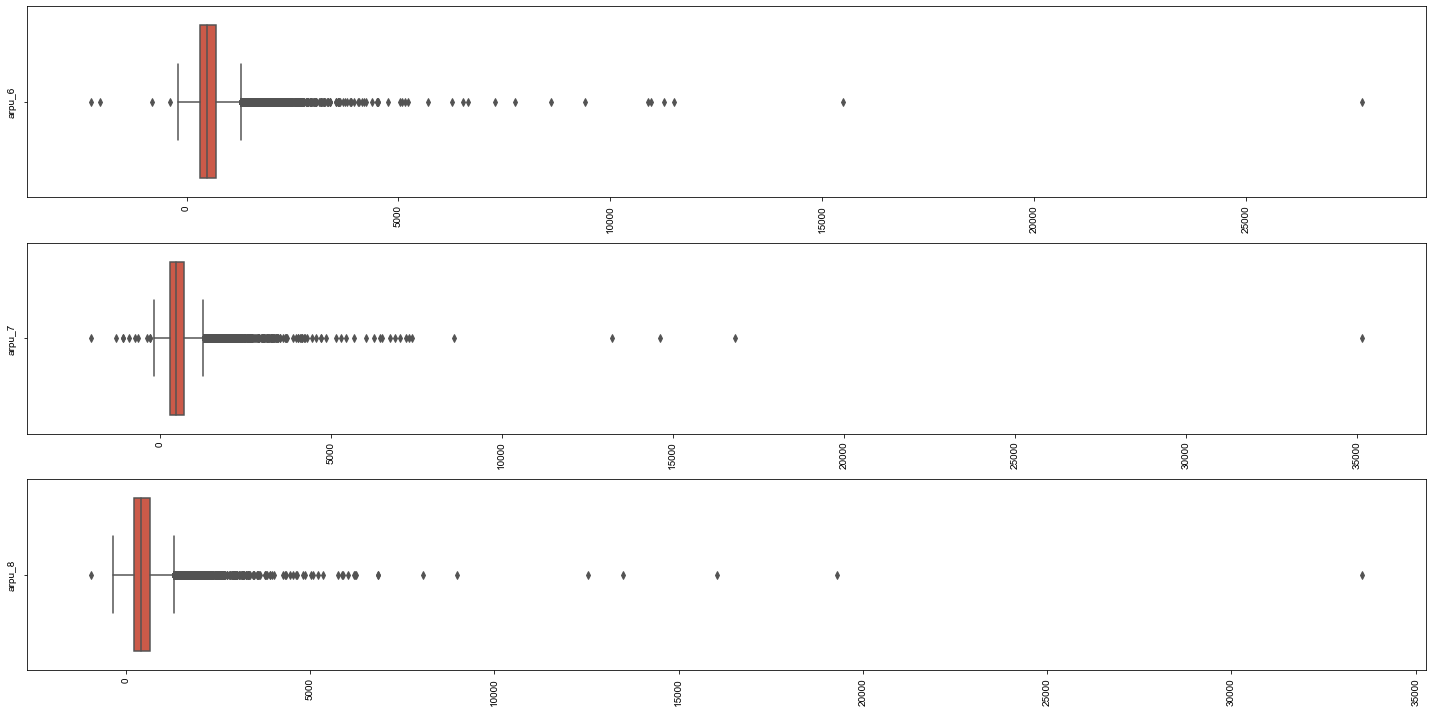

In [61]:
fig, axis = plt.subplots(3,1, figsize = (20,10))

plt.style.use('ggplot')
sns.set_style('whitegrid')

plt1 = sns.boxplot(x= 'arpu_6', data = filtered, ax = axis[0])
plt1.set(xlabel = '', ylabel= 'arpu_6')

plt1 = sns.boxplot(x= 'arpu_7', data = filtered, ax = axis[1])
plt1.set(xlabel = '', ylabel= 'arpu_7')

plt1 = sns.boxplot(x= 'arpu_8', data = filtered, ax = axis[2])
plt1.set(xlabel = '', ylabel= 'arpu_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

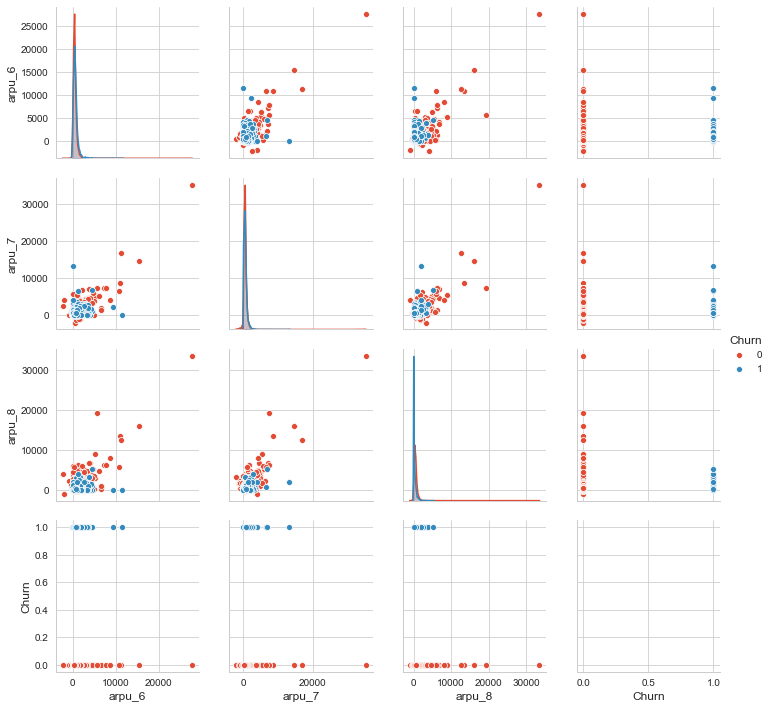

In [62]:
sns.pairplot(data=filtered[['arpu_6','arpu_7','arpu_8','Churn']],hue='Churn')
plt.show()

2/ Calls usage [Incoming]: 

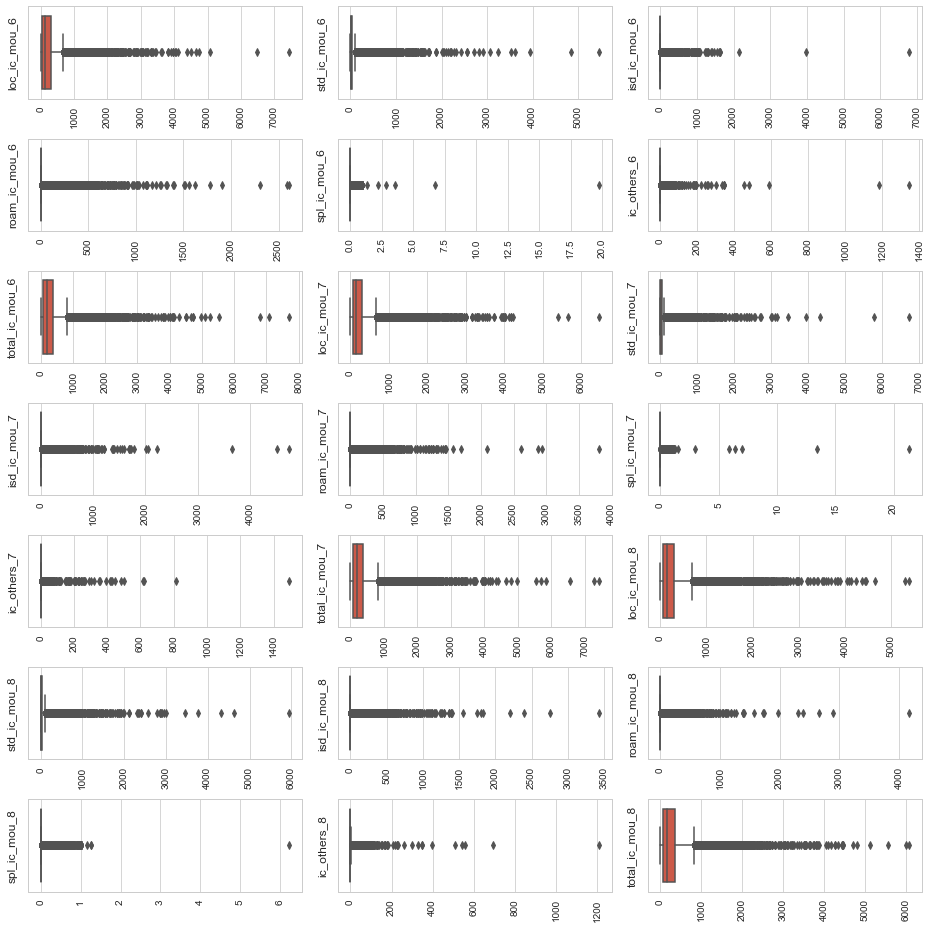

In [63]:
fig, axis = plt.subplots(7,3, figsize = (13,13))

plt1 = sns.boxplot(x= 'loc_ic_mou_6', data = filtered, ax = axis[0][0])
plt1.set(xlabel = '', ylabel= 'loc_ic_mou_6')

plt1 = sns.boxplot(x= 'std_ic_mou_6', data = filtered, ax = axis[0][1])
plt1.set(xlabel = '', ylabel= 'std_ic_mou_6')

plt1 = sns.boxplot(x= 'isd_ic_mou_6', data = filtered, ax = axis[0][2])
plt1.set(xlabel = '', ylabel= 'isd_ic_mou_6')

plt1 = sns.boxplot(x= 'roam_ic_mou_6', data = filtered, ax = axis[1][0])
plt1.set(xlabel = '', ylabel= 'roam_ic_mou_6')

plt1 = sns.boxplot(x= 'spl_ic_mou_6', data = filtered, ax = axis[1][1])
plt1.set(xlabel = '', ylabel= 'spl_ic_mou_6')

plt1 = sns.boxplot(x= 'ic_others_6', data = filtered, ax = axis[1][2])
plt1.set(xlabel = '', ylabel= 'ic_others_6')

plt1 = sns.boxplot(x= 'total_ic_mou_6', data = filtered, ax = axis[2][0])
plt1.set(xlabel = '', ylabel= 'total_ic_mou_6')

plt1 = sns.boxplot(x= 'loc_ic_mou_7', data = filtered, ax = axis[2][1])
plt1.set(xlabel = '', ylabel= 'loc_ic_mou_7')

plt1 = sns.boxplot(x= 'std_ic_mou_7', data = filtered, ax = axis[2][2])
plt1.set(xlabel = '', ylabel= 'std_ic_mou_7')

plt1 = sns.boxplot(x= 'isd_ic_mou_7', data = filtered, ax = axis[3][0])
plt1.set(xlabel = '', ylabel= 'isd_ic_mou_7')

plt1 = sns.boxplot(x= 'roam_ic_mou_7', data = filtered, ax = axis[3][1])
plt1.set(xlabel = '', ylabel= 'roam_ic_mou_7')

plt1 = sns.boxplot(x= 'spl_ic_mou_7', data = filtered, ax = axis[3][2])
plt1.set(xlabel = '', ylabel= 'spl_ic_mou_7')

plt1 = sns.boxplot(x= 'ic_others_7', data = filtered, ax = axis[4][0])
plt1.set(xlabel = '', ylabel= 'ic_others_7')

plt1 = sns.boxplot(x= 'total_ic_mou_7', data = filtered, ax = axis[4][1])
plt1.set(xlabel = '', ylabel= 'total_ic_mou_7')

plt1 = sns.boxplot(x= 'loc_ic_mou_8', data = filtered, ax = axis[4][2])
plt1.set(xlabel = '', ylabel= 'loc_ic_mou_8')

plt1 = sns.boxplot(x= 'std_ic_mou_8', data = filtered, ax = axis[5][0])
plt1.set(xlabel = '', ylabel= 'std_ic_mou_8')

plt1 = sns.boxplot(x= 'isd_ic_mou_8', data = filtered, ax = axis[5][1])
plt1.set(xlabel = '', ylabel= 'isd_ic_mou_8')

plt1 = sns.boxplot(x= 'roam_ic_mou_8', data = filtered, ax = axis[5][2])
plt1.set(xlabel = '', ylabel= 'roam_ic_mou_8')

plt1 = sns.boxplot(x= 'spl_ic_mou_8', data = filtered, ax = axis[6][0])
plt1.set(xlabel = '', ylabel= 'spl_ic_mou_8')

plt1 = sns.boxplot(x= 'ic_others_8', data = filtered, ax = axis[6][1])
plt1.set(xlabel = '', ylabel= 'ic_others_8')

plt1 = sns.boxplot(x= 'total_ic_mou_8', data = filtered, ax = axis[6][2])
plt1.set(xlabel = '', ylabel= 'total_ic_mou_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

3/ Calls usage [Outgoing]: 

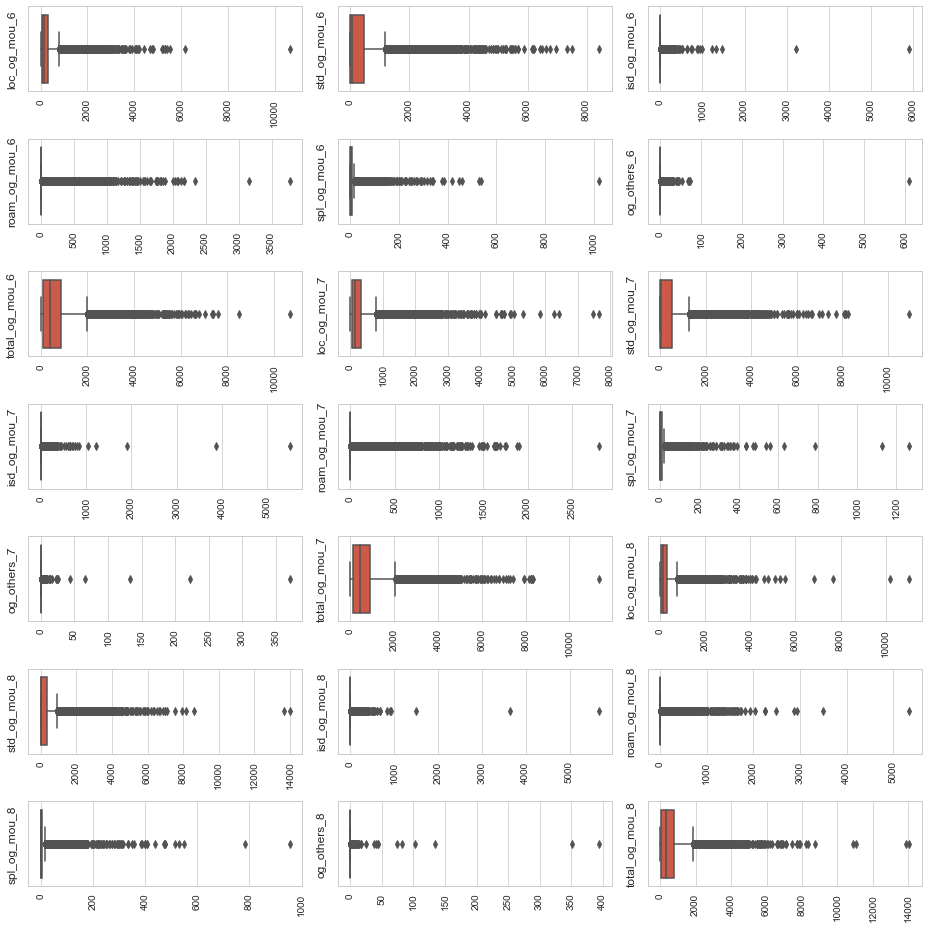

In [64]:
fig, axis = plt.subplots(7,3, figsize = (13,13))

plt1 = sns.boxplot(x= 'loc_og_mou_6', data = filtered, ax = axis[0][0])
plt1.set(xlabel = '', ylabel= 'loc_og_mou_6')

plt1 = sns.boxplot(x= 'std_og_mou_6', data = filtered, ax = axis[0][1])
plt1.set(xlabel = '', ylabel= 'std_og_mou_6')

plt1 = sns.boxplot(x= 'isd_og_mou_6', data = filtered, ax = axis[0][2])
plt1.set(xlabel = '', ylabel= 'isd_og_mou_6')

plt1 = sns.boxplot(x= 'roam_og_mou_6', data = filtered, ax = axis[1][0])
plt1.set(xlabel = '', ylabel= 'roam_og_mou_6')

plt1 = sns.boxplot(x= 'spl_og_mou_6', data = filtered, ax = axis[1][1])
plt1.set(xlabel = '', ylabel= 'spl_og_mou_6')

plt1 = sns.boxplot(x= 'og_others_6', data = filtered, ax = axis[1][2])
plt1.set(xlabel = '', ylabel= 'og_others_6')

plt1 = sns.boxplot(x= 'total_og_mou_6', data = filtered, ax = axis[2][0])
plt1.set(xlabel = '', ylabel= 'total_og_mou_6')

plt1 = sns.boxplot(x= 'loc_og_mou_7', data = filtered, ax = axis[2][1])
plt1.set(xlabel = '', ylabel= 'loc_og_mou_7')

plt1 = sns.boxplot(x= 'std_og_mou_7', data = filtered, ax = axis[2][2])
plt1.set(xlabel = '', ylabel= 'std_og_mou_7')

plt1 = sns.boxplot(x= 'isd_og_mou_7', data = filtered, ax = axis[3][0])
plt1.set(xlabel = '', ylabel= 'isd_og_mou_7')

plt1 = sns.boxplot(x= 'roam_og_mou_7', data = filtered, ax = axis[3][1])
plt1.set(xlabel = '', ylabel= 'roam_og_mou_7')

plt1 = sns.boxplot(x= 'spl_og_mou_7', data = filtered, ax = axis[3][2])
plt1.set(xlabel = '', ylabel= 'spl_og_mou_7')

plt1 = sns.boxplot(x= 'og_others_7', data = filtered, ax = axis[4][0])
plt1.set(xlabel = '', ylabel= 'og_others_7')

plt1 = sns.boxplot(x= 'total_og_mou_7', data = filtered, ax = axis[4][1])
plt1.set(xlabel = '', ylabel= 'total_og_mou_7')

plt1 = sns.boxplot(x= 'loc_og_mou_8', data = filtered, ax = axis[4][2])
plt1.set(xlabel = '', ylabel= 'loc_og_mou_8')

plt1 = sns.boxplot(x= 'std_og_mou_8', data = filtered, ax = axis[5][0])
plt1.set(xlabel = '', ylabel= 'std_og_mou_8')

plt1 = sns.boxplot(x= 'isd_og_mou_8', data = filtered, ax = axis[5][1])
plt1.set(xlabel = '', ylabel= 'isd_og_mou_8')

plt1 = sns.boxplot(x= 'roam_og_mou_8', data = filtered, ax = axis[5][2])
plt1.set(xlabel = '', ylabel= 'roam_og_mou_8')

plt1 = sns.boxplot(x= 'spl_og_mou_8', data = filtered, ax = axis[6][0])
plt1.set(xlabel = '', ylabel= 'spl_og_mou_8')

plt1 = sns.boxplot(x= 'og_others_8', data = filtered, ax = axis[6][1])
plt1.set(xlabel = '', ylabel= 'og_others_8')

plt1 = sns.boxplot(x= 'total_og_mou_8', data = filtered, ax = axis[6][2])
plt1.set(xlabel = '', ylabel= 'total_og_mou_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

4/ Mobile internet usage volume: 

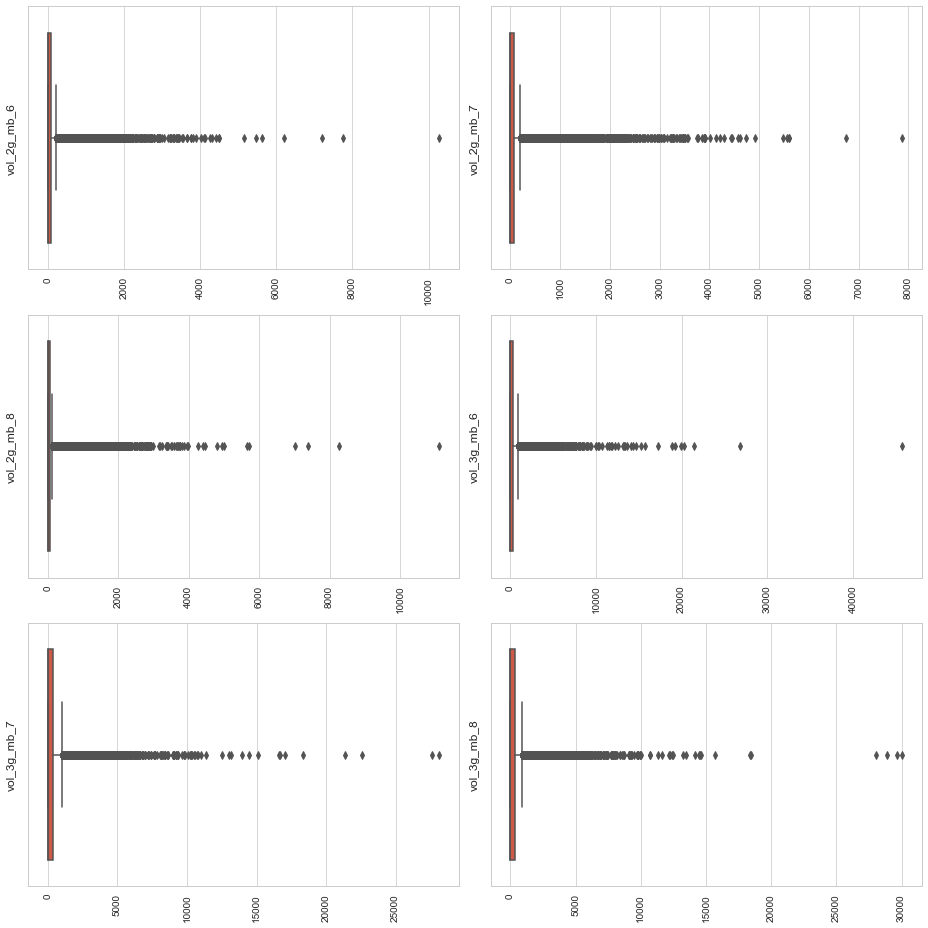

In [65]:
fig, axis = plt.subplots(3,2, figsize = (13,13))

plt1 = sns.boxplot(x= 'vol_2g_mb_6', data = filtered, ax = axis[0][0])
plt1.set(xlabel = '', ylabel= 'vol_2g_mb_6')

plt1 = sns.boxplot(x= 'vol_2g_mb_7', data = filtered, ax = axis[0][1])
plt1.set(xlabel = '', ylabel= 'vol_2g_mb_7')

plt1 = sns.boxplot(x= 'vol_2g_mb_8', data = filtered, ax = axis[1][0])
plt1.set(xlabel = '', ylabel= 'vol_2g_mb_8')

plt1 = sns.boxplot(x= 'vol_3g_mb_6', data = filtered, ax = axis[1][1])
plt1.set(xlabel = '', ylabel= 'vol_3g_mb_6')

plt1 = sns.boxplot(x= 'vol_3g_mb_7', data = filtered, ax = axis[2][0])
plt1.set(xlabel = '', ylabel= 'vol_3g_mb_7')

plt1 = sns.boxplot(x= 'vol_3g_mb_8', data = filtered, ax = axis[2][1])
plt1.set(xlabel = '', ylabel= 'vol_3g_mb_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

5/ Recharge columns : 

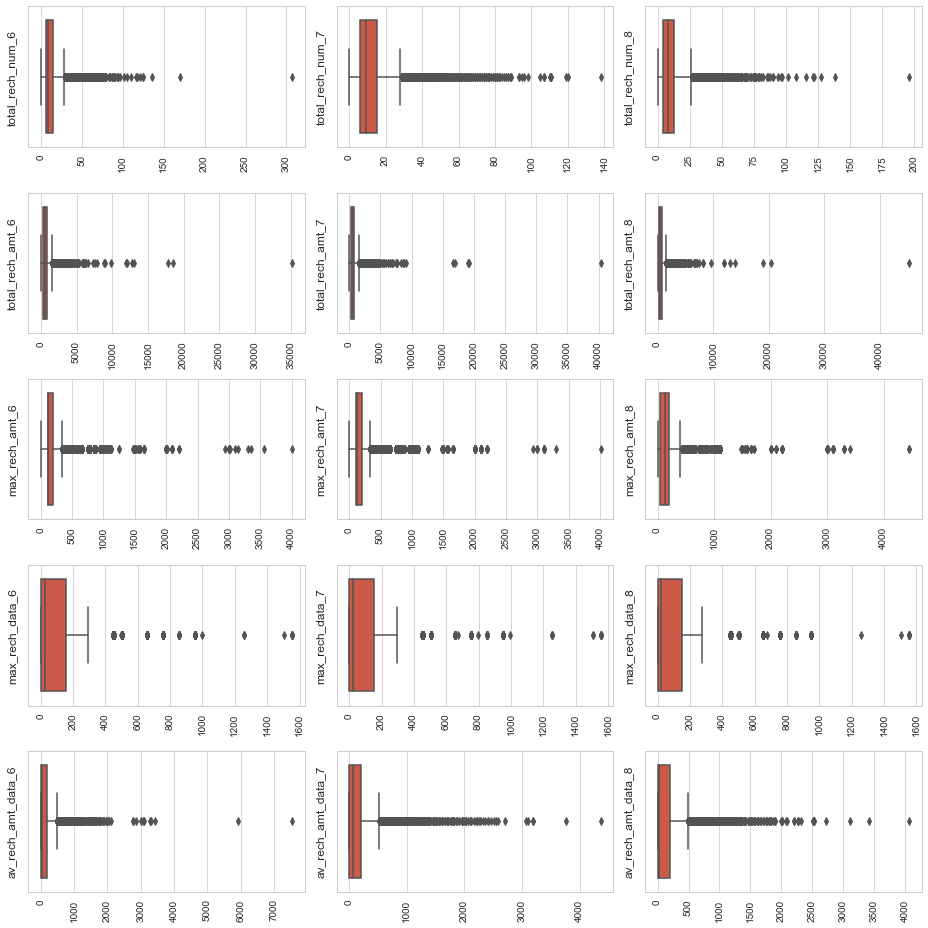

In [66]:
fig, axis = plt.subplots(5,3, figsize = (13,13))

plt1 = sns.boxplot(x= 'total_rech_num_6', data = filtered, ax = axis[0][0])
plt1.set(xlabel = '', ylabel= 'total_rech_num_6')

plt1 = sns.boxplot(x= 'total_rech_num_7', data = filtered, ax = axis[0][1])
plt1.set(xlabel = '', ylabel= 'total_rech_num_7')

plt1 = sns.boxplot(x= 'total_rech_num_8', data = filtered, ax = axis[0][2])
plt1.set(xlabel = '', ylabel= 'total_rech_num_8')

plt1 = sns.boxplot(x= 'total_rech_amt_6', data = filtered, ax = axis[1][0])
plt1.set(xlabel = '', ylabel= 'total_rech_amt_6')

plt1 = sns.boxplot(x= 'total_rech_amt_7', data = filtered, ax = axis[1][1])
plt1.set(xlabel = '', ylabel= 'total_rech_amt_7')

plt1 = sns.boxplot(x= 'total_rech_amt_8', data = filtered, ax = axis[1][2])
plt1.set(xlabel = '', ylabel= 'total_rech_amt_8')

plt1 = sns.boxplot(x= 'max_rech_amt_6', data = filtered, ax = axis[2][0])
plt1.set(xlabel = '', ylabel= 'max_rech_amt_6')

plt1 = sns.boxplot(x= 'max_rech_amt_7', data = filtered, ax = axis[2][1])
plt1.set(xlabel = '', ylabel= 'max_rech_amt_7')

plt1 = sns.boxplot(x= 'max_rech_amt_8', data = filtered, ax = axis[2][2])
plt1.set(xlabel = '', ylabel= 'max_rech_amt_8')

plt1 = sns.boxplot(x= 'max_rech_data_6', data = filtered, ax = axis[3][0])
plt1.set(xlabel = '', ylabel= 'max_rech_data_6')

plt1 = sns.boxplot(x= 'max_rech_data_7', data = filtered, ax = axis[3][1])
plt1.set(xlabel = '', ylabel= 'max_rech_data_7')

plt1 = sns.boxplot(x= 'max_rech_data_8', data = filtered, ax = axis[3][2])
plt1.set(xlabel = '', ylabel= 'max_rech_data_8')

plt1 = sns.boxplot(x= 'av_rech_amt_data_6', data = filtered, ax = axis[4][0])
plt1.set(xlabel = '', ylabel= 'av_rech_amt_data_6')

plt1 = sns.boxplot(x= 'av_rech_amt_data_7', data = filtered, ax = axis[4][1])
plt1.set(xlabel = '', ylabel= 'av_rech_amt_data_7')

plt1 = sns.boxplot(x= 'av_rech_amt_data_8', data = filtered, ax = axis[4][2])
plt1.set(xlabel = '', ylabel= 'av_rech_amt_data_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

Categorical columns : 

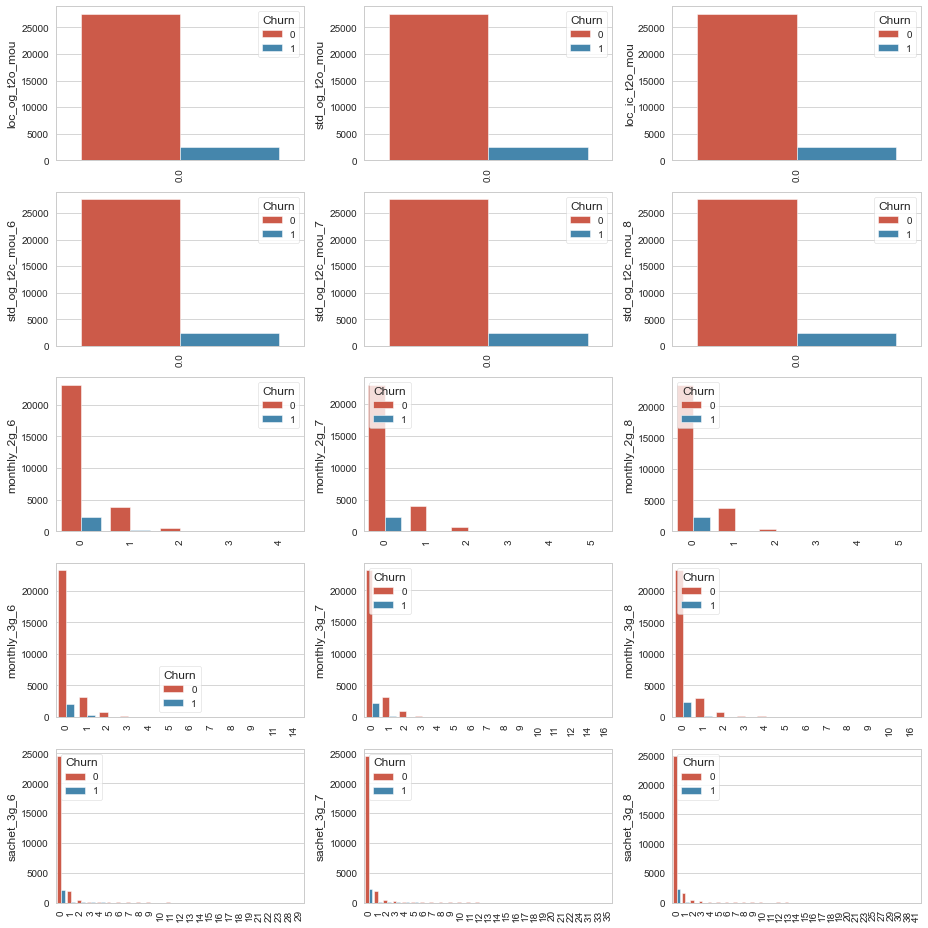

In [67]:
fig, axis = plt.subplots(5,3, figsize = (13,13))

plt1 = sns.countplot(x = 'loc_og_t2o_mou', data = filtered, hue = 'Churn', ax = axis[0][0])
plt1.set(xlabel = '', ylabel= 'loc_og_t2o_mou')

plt1 = sns.countplot(x = 'std_og_t2o_mou', data = filtered, hue = 'Churn', ax = axis[0][1])
plt1.set(xlabel = '', ylabel= 'std_og_t2o_mou')

plt1 = sns.countplot(x = 'loc_ic_t2o_mou', data = filtered, hue = 'Churn', ax = axis[0][2])
plt1.set(xlabel = '', ylabel= 'loc_ic_t2o_mou')

plt1 = sns.countplot(x = 'std_og_t2c_mou_6', data = filtered, hue = 'Churn', ax = axis[1][0])
plt1.set(xlabel = '', ylabel= 'std_og_t2c_mou_6')

plt1 = sns.countplot(x = 'std_og_t2c_mou_7', data = filtered, hue = 'Churn', ax = axis[1][1])
plt1.set(xlabel = '', ylabel= 'std_og_t2c_mou_7')

plt1 = sns.countplot(x = 'std_og_t2c_mou_8', data = filtered, hue = 'Churn', ax = axis[1][2])
plt1.set(xlabel = '', ylabel= 'std_og_t2c_mou_8')

plt1 = sns.countplot(x = 'monthly_2g_6', data = filtered, hue = 'Churn', ax = axis[2][0])
plt1.set(xlabel = '', ylabel= 'monthly_2g_6')

plt1 = sns.countplot(x = 'monthly_2g_7', data = filtered, hue = 'Churn', ax = axis[2][1])
plt1.set(xlabel = '', ylabel= 'monthly_2g_7')

plt1 = sns.countplot(x = 'monthly_2g_8', data = filtered, hue = 'Churn', ax = axis[2][2])
plt1.set(xlabel = '', ylabel= 'monthly_2g_8')

plt1 = sns.countplot(x = 'monthly_3g_6', data = filtered, hue = 'Churn', ax = axis[3][0])
plt1.set(xlabel = '', ylabel= 'monthly_3g_6')

plt1 = sns.countplot(x = 'monthly_3g_7', data = filtered, hue = 'Churn', ax = axis[3][1])
plt1.set(xlabel = '', ylabel= 'monthly_3g_7')

plt1 = sns.countplot(x = 'monthly_3g_8', data = filtered, hue = 'Churn', ax = axis[3][2])
plt1.set(xlabel = '', ylabel= 'monthly_3g_8')

plt1 = sns.countplot(x = 'sachet_3g_6', data = filtered, hue = 'Churn', ax = axis[4][0])
plt1.set(xlabel = '', ylabel= 'sachet_3g_6')

plt1 = sns.countplot(x = 'sachet_3g_7', data = filtered, hue = 'Churn', ax = axis[4][1])
plt1.set(xlabel = '', ylabel= 'sachet_3g_7')

plt1 = sns.countplot(x = 'sachet_3g_8', data = filtered, hue = 'Churn', ax = axis[4][2])
plt1.set(xlabel = '', ylabel= 'sachet_3g_8')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.show()

### Performing encoding techniques on categorical features : 

In [68]:
filtered[categorical_columns].nunique()

loc_og_t2o_mou       1
std_og_t2o_mou       1
loc_ic_t2o_mou       1
std_og_t2c_mou_6     1
std_og_t2c_mou_7     1
std_og_t2c_mou_8     1
std_ic_t2o_mou_6     1
std_ic_t2o_mou_7     1
std_ic_t2o_mou_8     1
monthly_2g_6         5
monthly_2g_7         6
monthly_2g_8         6
monthly_3g_6        12
monthly_3g_7        15
monthly_3g_8        12
sachet_3g_6         25
sachet_3g_7         27
sachet_3g_8         29
Churn                2
dtype: int64

One hot encoding is applied on features upto 12 distinct categories : 

In [69]:
filtered = pd.get_dummies(data = filtered, columns = ['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8'], drop_first = True)
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

One hot encoding [With multiple categorical features] : 

   - sachet_3g_6[25]
   - sachet_3g_7[27]
   - sachet_3g_8 [29]

In [70]:
top_5_sachet_3g_6 = list(filtered['sachet_3g_6'].value_counts(ascending = False).head().index)
top_5_sachet_3g_6

[0, 1, 2, 3, 4]

In [71]:
for i in top_5_sachet_3g_6:
    filtered[i] = np.where(filtered['sachet_3g_6'] == i, 1, 0)
    
filtered.rename(columns = {0 : 'sachet_3g_6 - 0', 1 : 'sachet_3g_6 - 1',
                                   2 : 'sachet_3g_6 - 2', 3 : 'sachet_3g_6 - 3',
                                   4 : 'sachet_3g_6 - 4'}, inplace = True)

filtered.drop('sachet_3g_6', axis = 1, inplace = True)
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [72]:
top_5_sachet_3g_7 = list(filtered['sachet_3g_7'].value_counts(ascending = False).head().index)
top_5_sachet_3g_7

[0, 1, 2, 3, 4]

In [73]:
for i in top_5_sachet_3g_7:
    filtered[i] = np.where(filtered['sachet_3g_7'] == i, 1, 0)
    
filtered.rename(columns = {0 : 'sachet_3g_7 - 0', 1 : 'sachet_3g_7 - 1',
                                   2 : 'sachet_3g_7 - 2', 3 : 'sachet_3g_7 - 3',
                                   4 : 'sachet_3g_7 - 4'}, inplace = True)

filtered.drop('sachet_3g_7', axis = 1, inplace = True)
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [74]:
top_5_sachet_3g_8 = list(filtered['sachet_3g_8'].value_counts(ascending = False).head().index)
top_5_sachet_3g_8

[0, 1, 2, 3, 4]

In [75]:
for i in top_5_sachet_3g_8:
    filtered[i] = np.where(filtered['sachet_3g_8'] == i, 1, 0)
    
filtered.rename(columns = {0 : 'sachet_3g_8 - 0', 1 : 'sachet_3g_8 - 1',
                                   2 : 'sachet_3g_8 - 2', 3 : 'sachet_3g_8 - 3',
                                   4 : 'sachet_3g_8 - 4'}, inplace = True)

filtered.drop('sachet_3g_8', axis = 1, inplace = True)
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

### Feature Engineering :

Derive new features : 

Create a new feature from good months[June and July] and compare with the action phase[August]

In [76]:
filtered['AVG_arpu_6_7'] = filtered[['arpu_6','arpu_7']].mean(axis=1)
filtered['is_arpu_flag'] = np.where((filtered['arpu_8'] > filtered['AVG_arpu_6_7']), 0, 1)

filtered['AVG_onnet_mou_6_7'] = filtered[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
filtered['is_onnet_mou_flag'] = np.where((filtered['onnet_mou_8'] > filtered['AVG_onnet_mou_6_7']), 0, 1)

filtered['AVG_offnet_mou_6_7'] = filtered[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
filtered['is_offnet_mou_flag'] = np.where((filtered['offnet_mou_8'] > filtered['AVG_offnet_mou_6_7']), 0, 1)

filtered['AVG_roam_ic_mou_6_7'] = filtered[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
filtered['is_roam_ic_mou_flag'] = np.where((filtered['roam_ic_mou_8'] > filtered['AVG_roam_ic_mou_6_7']), 0, 1)

filtered['AVG_roam_og_mou_6_7'] = filtered[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
filtered['is_roam_og_mou_flag'] = np.where((filtered['roam_og_mou_8'] > filtered['AVG_roam_og_mou_6_7']), 0, 1)

filtered['AVG_loc_og_t2t_mou_6_7'] = filtered[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
filtered['is_loc_og_t2t_mou_flag'] = np.where((filtered['loc_og_t2t_mou_8'] > filtered['AVG_loc_og_t2t_mou_6_7']), 0, 1)

filtered['AVG_loc_og_t2m_mou_6_7'] = filtered[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
filtered['is_loc_og_t2m_mou_flag'] = np.where((filtered['loc_og_t2m_mou_8'] > filtered['AVG_loc_og_t2m_mou_6_7']), 0, 1)

filtered['AVG_loc_og_t2f_mou_6_7'] = filtered[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
filtered['is_loc_og_t2f_mou_flag'] = np.where((filtered['loc_og_t2f_mou_8'] > filtered['AVG_loc_og_t2f_mou_6_7']), 0, 1)

filtered['AVG_loc_og_t2c_mou_6_7'] = filtered[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
filtered['is_loc_og_t2c_mou_flag'] = np.where((filtered['loc_og_t2c_mou_8'] > filtered['AVG_loc_og_t2c_mou_6_7']), 0, 1)

filtered['AVG_std_og_t2t_mou_6_7'] = filtered[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
filtered['is_std_og_t2t_mou_flag'] = np.where((filtered['std_og_t2t_mou_8'] > filtered['AVG_std_og_t2t_mou_6_7']), 0, 1)

filtered['AVG_std_og_t2m_mou_6_7'] = filtered[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
filtered['is_std_og_t2m_mou_flag'] = np.where((filtered['std_og_t2m_mou_8'] > filtered['AVG_std_og_t2m_mou_6_7']), 0, 1)

filtered['AVG_std_og_t2f_mou_6_7'] = filtered[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
filtered['is_std_og_t2f_mou_flag'] = np.where((filtered['std_og_t2f_mou_8'] > filtered['AVG_std_og_t2f_mou_6_7']), 0, 1)

filtered['AVG_isd_og_mou_6_7'] = filtered[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
filtered['is_isd_og_mou_flag'] = np.where((filtered['isd_og_mou_8'] > filtered['AVG_isd_og_mou_6_7']), 0, 1)

filtered['AVG_spl_og_mou_6_7'] = filtered[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
filtered['is_spl_og_mou_flag'] = np.where((filtered['spl_og_mou_8'] > filtered['AVG_spl_og_mou_6_7']), 0, 1)

filtered['AVG_og_others_6_7'] = filtered[['og_others_6','og_others_7']].mean(axis=1)
filtered['is_og_others_flag'] = np.where((filtered['og_others_8'] > filtered['AVG_og_others_6_7']), 0, 1)

filtered['AVG_loc_ic_t2t_mou_6_7'] = filtered[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
filtered['is_loc_ic_t2t_mou_flag'] = np.where((filtered['loc_ic_t2t_mou_8'] > filtered['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

filtered['AVG_loc_ic_t2m_mou_6_7'] = filtered[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
filtered['is_loc_ic_t2m_mou_flag'] = np.where((filtered['loc_ic_t2m_mou_8'] > filtered['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

filtered['AVG_loc_ic_t2f_mou_6_7'] = filtered[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
filtered['is_loc_ic_t2f_mou_flag'] = np.where((filtered['loc_ic_t2f_mou_8'] > filtered['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

filtered['AVG_std_ic_t2t_mou_6_7'] = filtered[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
filtered['is_std_ic_t2t_mou_flag'] = np.where((filtered['std_ic_t2t_mou_8'] > filtered['AVG_std_ic_t2t_mou_6_7']), 0, 1)

filtered['AVG_std_ic_t2m_mou_6_7'] = filtered[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
filtered['is_std_ic_t2m_mou_flag'] = np.where((filtered['std_ic_t2m_mou_8'] > filtered['AVG_std_ic_t2m_mou_6_7']), 0, 1)

filtered['AVG_std_ic_t2f_mou_6_7'] = filtered[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
filtered['is_std_ic_t2f_mou_flag'] = np.where((filtered['std_ic_t2f_mou_8'] > filtered['AVG_std_ic_t2f_mou_6_7']), 0, 1)

filtered['AVG_spl_ic_mou_6_7'] = filtered[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
filtered['is_spl_ic_mou_flag'] = np.where((filtered['spl_ic_mou_8'] > filtered['AVG_spl_ic_mou_6_7']), 0, 1)

filtered['AVG_isd_ic_mou_6_7'] = filtered[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
filtered['is_isd_ic_mou_flag'] = np.where((filtered['isd_ic_mou_8'] > filtered['AVG_isd_ic_mou_6_7']), 0, 1)

filtered['AVG_ic_others_6_7'] = filtered[['ic_others_6','ic_others_7']].mean(axis=1)
filtered['is_ic_others_flag'] = np.where((filtered['ic_others_8'] > filtered['AVG_ic_others_6_7']), 0, 1)

filtered['AVG_total_rech_amt_6_7'] = filtered[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
filtered['is_total_rech_amt_flag'] = np.where((filtered['total_rech_amt_8'] > filtered['AVG_total_rech_amt_6_7']), 0, 1)

filtered['AVG_vol_2g_mb_6_7'] = filtered[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
filtered['is_vol_2g_mb_flag'] = np.where((filtered['vol_2g_mb_8'] > filtered['AVG_vol_2g_mb_6_7']), 0, 1)

filtered['AVG_vol_3g_mb_6_7'] = filtered[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
filtered['is_vol_3g_mb_flag'] = np.where((filtered['vol_3g_mb_8'] > filtered['AVG_vol_3g_mb_6_7']), 0, 1)

filtered['AVG_vbc_3g_6_7'] = filtered[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
filtered['is_vbc_3g_flag'] = np.where((filtered['aug_vbc_3g'] > filtered['AVG_vbc_3g_6_7']), 0, 1)

filtered['AVG_loc_og_mou_6_7'] = filtered[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
filtered['is_loc_og_mou_flag'] = np.where((filtered['loc_og_mou_8'] > filtered['AVG_loc_og_mou_6_7']), 0, 1)

filtered['AVG_std_og_mou_6_7'] = filtered[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
filtered['is_std_og_mou_flag'] = np.where((filtered['std_og_mou_8'] > filtered['AVG_std_og_mou_6_7']), 0, 1)

filtered['AVG_total_og_mou_6_7'] = filtered[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
filtered['is_total_og_mou_flag'] = np.where((filtered['total_og_mou_8'] > filtered['AVG_total_og_mou_6_7']), 0, 1)

filtered['AVG_loc_ic_mou_6_7'] = filtered[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
filtered['is_loc_ic_mou_flag'] = np.where((filtered['loc_ic_mou_8'] > filtered['AVG_loc_ic_mou_6_7']), 0, 1)

filtered['AVG_std_ic_mou_6_7'] = filtered[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
filtered['is_std_ic_mou_flag'] = np.where((filtered['std_ic_mou_8'] > filtered['AVG_std_ic_mou_6_7']), 0, 1)

filtered['AVG_total_ic_mou_6_7'] = filtered[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
filtered['is_total_ic_mou_flag'] = np.where((filtered['total_ic_mou_8'] > filtered['AVG_total_ic_mou_6_7']), 0, 1)

Create month on month change features to understand any risk associated with the churn

In [77]:
filtered['loc_og_t2t_mou_7diff6'] = filtered['loc_og_t2t_mou_7'] - filtered['loc_og_t2t_mou_6']
filtered['loc_og_t2m_mou_7diff6'] = filtered['loc_og_t2m_mou_7'] - filtered['loc_og_t2m_mou_6']
filtered['loc_og_t2f_mou_7diff6'] = filtered['loc_og_t2f_mou_7'] - filtered['loc_og_t2f_mou_6']
filtered['loc_og_t2c_mou_7diff6'] = filtered['loc_og_t2c_mou_7'] - filtered['loc_og_t2c_mou_6']
filtered['loc_og_mou_7diff6'] = filtered['loc_og_mou_7'] - filtered['loc_og_mou_6']
filtered['std_og_t2t_mou_7diff6'] = filtered['std_og_t2t_mou_7'] - filtered['std_og_t2t_mou_6']
filtered['std_og_t2m_mou_7diff6'] = filtered['std_og_t2m_mou_7'] - filtered['std_og_t2m_mou_6']
filtered['std_og_t2f_mou_7diff6'] = filtered['std_og_t2f_mou_7'] - filtered['std_og_t2f_mou_6']
filtered['std_og_mou_7diff6'] = filtered['std_og_mou_7'] - filtered['std_og_mou_6']
filtered['loc_og_mou_7diff6'] = filtered['loc_og_mou_7'] - filtered['loc_og_mou_6']
filtered['std_og_mou_7diff6'] = filtered['std_og_mou_7'] - filtered['std_og_mou_6']
filtered['isd_og_mou_7diff6'] = filtered['isd_og_mou_7'] - filtered['isd_og_mou_6']
filtered['spl_og_mou_7diff6'] = filtered['spl_og_mou_7'] - filtered['spl_og_mou_6']
filtered['og_others_7diff6'] = filtered['og_others_7'] - filtered['og_others_6']
filtered['total_og_mou_7diff6'] = filtered['total_og_mou_7'] - filtered['total_og_mou_6']

filtered['loc_og_t2t_mou_8diff7'] = filtered['loc_og_t2t_mou_8'] - filtered['loc_og_t2t_mou_7']
filtered['loc_og_t2m_mou_8diff7'] = filtered['loc_og_t2m_mou_8'] - filtered['loc_og_t2m_mou_7']
filtered['loc_og_t2f_mou_8diff7'] = filtered['loc_og_t2f_mou_8'] - filtered['loc_og_t2f_mou_7']
filtered['loc_og_t2c_mou_8diff7'] = filtered['loc_og_t2c_mou_8'] - filtered['loc_og_t2c_mou_7']
filtered['loc_og_mou_8diff7'] = filtered['loc_og_mou_8'] - filtered['loc_og_mou_7']
filtered['std_og_t2t_mou_8diff7'] = filtered['std_og_t2t_mou_8'] - filtered['std_og_t2t_mou_7']
filtered['std_og_t2m_mou_8diff7'] = filtered['std_og_t2m_mou_8'] - filtered['std_og_t2m_mou_7']
filtered['std_og_t2f_mou_8diff7'] = filtered['std_og_t2f_mou_8'] - filtered['std_og_t2f_mou_7']
filtered['std_og_mou_8diff7'] = filtered['std_og_mou_8'] - filtered['std_og_mou_7']
filtered['loc_og_mou_8diff7'] = filtered['loc_og_mou_8'] - filtered['loc_og_mou_7']
filtered['std_og_mou_8diff7'] = filtered['std_og_mou_8'] - filtered['std_og_mou_7']
filtered['isd_og_mou_8diff7'] = filtered['isd_og_mou_8'] - filtered['isd_og_mou_7']
filtered['spl_og_mou_8diff7'] = filtered['spl_og_mou_8'] - filtered['spl_og_mou_7']
filtered['og_others_8diff7'] = filtered['og_others_8'] - filtered['og_others_7']
filtered['total_og_mou_8diff7'] = filtered['total_og_mou_8'] - filtered['total_og_mou_7']

filtered['loc_ic_t2t_mou_7diff6'] = filtered['loc_ic_t2t_mou_7'] - filtered['loc_ic_t2t_mou_6']
filtered['loc_ic_t2m_mou_7diff6'] = filtered['loc_ic_t2m_mou_7'] - filtered['loc_ic_t2m_mou_6']
filtered['loc_ic_t2f_mou_7diff6'] = filtered['loc_ic_t2f_mou_7'] - filtered['loc_ic_t2f_mou_6']
filtered['loc_ic_mou_7diff6'] = filtered['loc_ic_mou_7'] - filtered['loc_ic_mou_6']
filtered['std_ic_t2t_mou_7diff6'] = filtered['std_ic_t2t_mou_7'] - filtered['std_ic_t2t_mou_6']
filtered['std_ic_t2m_mou_7diff6'] = filtered['std_ic_t2m_mou_7'] - filtered['std_ic_t2m_mou_6']
filtered['std_ic_t2f_mou_7diff6'] = filtered['std_ic_t2f_mou_7'] - filtered['std_ic_t2f_mou_6']
filtered['std_ic_mou_7diff6'] = filtered['std_ic_mou_7'] - filtered['std_ic_mou_6']
filtered['loc_ic_mou_7diff6'] = filtered['loc_ic_mou_7'] - filtered['loc_ic_mou_6']
filtered['std_ic_mou_7diff6'] = filtered['std_ic_mou_7'] - filtered['std_ic_mou_6']
filtered['spl_ic_mou_7diff6'] = filtered['spl_ic_mou_7'] - filtered['spl_ic_mou_6']
filtered['isd_ic_mou_7diff6'] = filtered['isd_ic_mou_7'] - filtered['isd_ic_mou_6']
filtered['ic_others_7diff6'] = filtered['ic_others_7'] - filtered['ic_others_6']
filtered['total_ic_mou_7diff6'] = filtered['total_ic_mou_7'] - filtered['total_ic_mou_6']

filtered['loc_ic_t2t_mou_8diff7'] = filtered['loc_ic_t2t_mou_8'] - filtered['loc_ic_t2t_mou_7']
filtered['loc_ic_t2m_mou_8diff7'] = filtered['loc_ic_t2m_mou_8'] - filtered['loc_ic_t2m_mou_7']
filtered['loc_ic_t2f_mou_8diff7'] = filtered['loc_ic_t2f_mou_8'] - filtered['loc_ic_t2f_mou_7']
filtered['loc_ic_mou_8diff7'] = filtered['loc_ic_mou_8'] - filtered['loc_ic_mou_7']
filtered['std_ic_t2t_mou_8diff7'] = filtered['std_ic_t2t_mou_8'] - filtered['std_ic_t2t_mou_7']
filtered['std_ic_t2m_mou_8diff7'] = filtered['std_ic_t2m_mou_8'] - filtered['std_ic_t2m_mou_7']
filtered['std_ic_t2f_mou_8diff7'] = filtered['std_ic_t2f_mou_8'] - filtered['std_ic_t2f_mou_7']
filtered['std_ic_mou_8diff7'] = filtered['std_ic_mou_8'] - filtered['std_ic_mou_7']
filtered['loc_ic_mou_8diff7'] = filtered['loc_ic_mou_8'] - filtered['loc_ic_mou_7']
filtered['std_ic_mou_8diff7'] = filtered['std_ic_mou_8'] - filtered['std_ic_mou_7']
filtered['spl_ic_mou_8diff7'] = filtered['spl_ic_mou_8'] - filtered['spl_ic_mou_7']
filtered['isd_ic_mou_8diff7'] = filtered['isd_ic_mou_8'] - filtered['isd_ic_mou_7']
filtered['ic_others_8diff7'] = filtered['ic_others_8'] - filtered['ic_others_7']
filtered['total_ic_mou_8diff7'] = filtered['total_ic_mou_8'] - filtered['total_ic_mou_7']

filtered['onnet_mou_7diff6'] = filtered['onnet_mou_7'] - filtered['onnet_mou_6']
filtered['onnet_mou_8diff7'] = filtered['onnet_mou_8'] - filtered['onnet_mou_7']

filtered['offnet_mou_7diff6'] = filtered['offnet_mou_7'] - filtered['offnet_mou_6']
filtered['offnet_mou_8diff7'] = filtered['offnet_mou_8'] - filtered['offnet_mou_7']

filtered['roam_ic_mou_7diff6'] = filtered['roam_ic_mou_7'] - filtered['roam_ic_mou_6']
filtered['roam_ic_mou_8diff7'] = filtered['roam_ic_mou_8'] - filtered['roam_ic_mou_7']

filtered['roam_og_mou_7diff6'] = filtered['roam_og_mou_7'] - filtered['roam_og_mou_6']
filtered['roam_og_mou_8diff7'] = filtered['roam_og_mou_8'] - filtered['roam_og_mou_7']

filtered['total_rech_amt_7diff6'] = filtered['total_rech_amt_7'] - filtered['total_rech_amt_6']
filtered['total_rech_amt_8diff7'] = filtered['total_rech_amt_8'] - filtered['total_rech_amt_7']

filtered['vol_2g_mb_7diff6'] = filtered['vol_2g_mb_7'] - filtered['vol_2g_mb_6']
filtered['vol_2g_mb_8diff7'] = filtered['vol_2g_mb_8'] - filtered['vol_2g_mb_7']

filtered['vol_3g_mb_7diff6'] = filtered['vol_3g_mb_7'] - filtered['vol_3g_mb_6']
filtered['vol_3g_mb_8diff7'] = filtered['vol_3g_mb_8'] - filtered['vol_3g_mb_7']

filtered['vbc_3g_7diff6'] = filtered['jul_vbc_3g'] - filtered['jun_vbc_3g']
filtered['vbc_3g_8diff7'] = filtered['aug_vbc_3g'] - filtered['jul_vbc_3g']

In [78]:
filtered.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6    arpu_7  \
0             0.0             0.0             0.0   197.385   214.816   
1             0.0             0.0             0.0  1069.180  1349.850   
2             0.0             0.0             0.0   378.721   492.223   
3             0.0             0.0             0.0   514.453   597.753   
4             0.0             0.0             0.0    74.350   193.897   

     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803    24.546667     1.206667         0.00        130.72   
1  3171.480    57.840000    54.680000        52.29        453.43   
2   137.362   413.690000   351.030000        35.08         94.66   
3   637.760   102.410000   132.110000        85.14        757.93   
4   366.966    48.960000    50.660000        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0     16.483333          0.00          73.99           0.00           0.00   
1    567.160000        325.91          16.23          33.49          31.64   
2     80.630000        136.48           0.00           0.00           0.00   
3    896.680000        983.39           0.00           0.00           0.00   
4     89.360000        205.89           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0         117.64           0.00           0.00         18.396667   
1          23.74          12.59          38.06         51.390000   
2           0.00           0.00           0.00        297.130000   
3           0.00           0.00           0.00          4.480000   
4           0.00           0.00           0.00         48.960000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          1.206667              0.00         15.443333          4.483333   
1         31.380000             40.28        308.630000        447.380000   
2        217.590000             12.49         80.960000         70.580000   
3          6.160000             23.34         91.810000         87.930000   
4         50.660000             33.58         82.940000         83.010000   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00              0.00              0.00              0.00   
1            162.28             62.13             55.14             53.23   
2             50.54              0.00              0.00              0.00   
3            104.81              0.75              0.00              1.58   
4            148.56              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0               0.0              0.00     33.843333   
1               0.0               0.0              0.00    422.160000   
2               0.0               0.0              7.15    378.090000   
3               0.0               0.0              0.00     97.040000   
4               0.0               0.0             17.71    131.910000   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0      5.696667          0.00          3.233333              0.00   
1    533.910000        255.79          4.300000             23.29   
2    288.180000         63.04        116.560000            133.43   
3     94.090000        129.74         97.930000            125.94   
4    133.680000        182.14          0.000000              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00              0.00         11.996667              0.00   
1             12.01             49.89         31.760000             49.14   
2             22.58             13.69         10.040000             75.69   
3             61.79            665.36        808.740000            876.99   
4              0.00              2.36          6.350000             39.61   

   std_og_t2f_mou_6  std_og_t2f_mo

In [79]:
filtered.shape

(30001, 333)

Dropping columns of June and July as we will now use derived variables :

In [80]:
not_required = list(data.filter(regex = '6|7').columns)
not_required.remove('av_rech_amt_data_6')
not_required.remove('av_rech_amt_data_7')
not_required.remove('avg_amt_data_6_7')
not_required

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_mou_6',
 'std_og_mou_7',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'og_others_6',
 'og_others_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2o

In [81]:
churn = filtered.drop(not_required, axis = 1,errors='ignore')
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_8  \
0             0.0             0.0             0.0   213.803         0.00   
1             0.0             0.0             0.0  3171.480        52.29   
2             0.0             0.0             0.0   137.362        35.08   
3             0.0             0.0             0.0   637.760        85.14   
4             0.0             0.0             0.0   366.966        33.58   

   offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0          0.00           0.00           0.00              0.00   
1        325.91          31.64          38.06             40.28   
2        136.48           0.00           0.00             12.49   
3        983.39           0.00           0.00             23.34   
4        205.89           0.00           0.00             33.58   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0              0.00              0.00              0.00          0.00   
1            162.28             53.23              0.00        255.79   
2             50.54              0.00              7.15         63.04   
3            104.81              1.58              0.00        129.74   
4            148.56              0.00             17.71        182.14   

   std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_t2c_mou_8  \
0              0.00              0.00              0.00               0.0   
1             12.01             49.14             16.68               0.0   
2             22.58             75.69              0.00               0.0   
3             61.79            876.99              0.00               0.0   
4              0.00             39.61              0.00               0.0   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0          0.00          0.00          0.00          0.0            0.00   
1         77.84         10.01          6.50          0.0          350.16   
2         98.28          0.00         10.23          0.0          171.56   
3        938.79          0.00          0.00          0.0         1068.54   
4         39.61          0.00         17.71          0.0          239.48   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0              0.16              4.13              1.15          5.44   
1             27.31            121.19             39.53        188.04   
2              0.31             15.48              0.00         15.79   
3             19.54            129.16             10.39        159.11   
4             76.64            146.84              0.71        224.21   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  \
0              0.00              0.00              0.00               0.0   
1             30.39            141.33             22.21               0.0   
2              0.10              0.65              0.00               0.0   
3              0.18            101.74              0.00               0.0   
4             13.38             43.91              0.00               0.0   

   std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0          0.00            5.44           0.0          0.00         0.00   
1        193.94          428.74           0.0         31.59        15.14   
2          0.75           16.54           0.0          0.00         0.00   
3        101.93          261.04           0.0          0.00         0.00   
4         57.29          298.33           0.0          3.74        13.06   

   total_rech_num_8  total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  \
0                 2               252             252                 252   
1                 7              3638            1580                 779   
2                14               120              30                  10   
3                27               718              50                  50   
4                 4               439   

In [82]:
churn.shape

(30001, 251)

### Checking for correlations : 

In [83]:
correlation_matrix = churn.corr()
AbsoluteCorrelationMatrix = correlation_matrix.abs()
AbsoluteCorrelationMatrix = AbsoluteCorrelationMatrix.where(np.triu(np.ones(AbsoluteCorrelationMatrix.shape), k=1).astype(np.bool))
highCorrelatedIndices = np.where(AbsoluteCorrelationMatrix > 0.8)
correlated_pairs = [(AbsoluteCorrelationMatrix.index[x], AbsoluteCorrelationMatrix.columns[y]) 
                     for x,y in zip(*highCorrelatedIndices) if x!=y and x < y]

print("Total Number of correlated pairs: ", len(correlated_pairs))
correlated_pairs

Total Number of correlated pairs:  36


[('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('loc_og_t2t_mou_8', 'AVG_loc_og_t2t_mou_6_7'),
 ('loc_og_mou_8', 'AVG_loc_og_mou_6_7'),
 ('std_og_mou_8', 'total_og_mou_8'),
 ('isd_og_mou_8', 'AVG_isd_og_mou_6_7'),
 ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'),
 ('loc_ic_mou_8', 'total_ic_mou_8'),
 ('loc_ic_mou_8', 'AVG_loc_ic_mou_6_7'),
 ('std_ic_t2m_mou_8', 'std_ic_mou_8'),
 ('total_ic_mou_8', 'AVG_total_ic_mou_6_7'),
 ('total_rech_data_8', 'sachet_2g_8'),
 ('max_rech_data_8', 'av_rech_amt_data_8'),
 ('jul_vbc_3g', 'AVG_vbc_3g_6_7'),
 ('jun_vbc_3g', 'AVG_vbc_3g_6_7'),
 ('monthly_3g_7_10', 'monthly_3g_8_16'),
 ('sachet_3g_6 - 0', 'sachet_3g_6 - 1'),
 ('AVG_arpu_6_7', 'AVG_total_rech_amt_6_7'),
 ('AVG_onnet_mou_6_7', 'AVG_std_og_t2t_mou_6_7'),
 ('AVG_offnet_mou_6_7', 'AVG_std_og_t2m_mou_6_7'),
 ('is_roam_ic_mou_flag', 'is_roam_og_mou_flag'),
 ('AVG_loc_ic_t2m_mou_6_7', 'AVG_loc_ic_mou_6_7'),
 ('AVG_std_ic_t2m_mou_6_7', 'AVG_std_ic_

In [84]:
corr_matrix = churn.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop

['std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'total_ic_mou_8',
 'total_rech_amt_8',
 'sachet_2g_8',
 'monthly_3g_8_16',
 'AVG_std_og_t2t_mou_6_7',
 'AVG_isd_og_mou_6_7',
 'AVG_total_rech_amt_6_7',
 'AVG_vbc_3g_6_7',
 'AVG_total_ic_mou_6_7',
 'total_og_mou_7diff6',
 'total_og_mou_8diff7',
 'onnet_mou_7diff6',
 'onnet_mou_8diff7',
 'offnet_mou_7diff6',
 'offnet_mou_8diff7']

In [85]:
churn.drop(to_drop, axis=1,inplace=True)
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_8  \
0             0.0             0.0             0.0   213.803         0.00   
1             0.0             0.0             0.0  3171.480        52.29   
2             0.0             0.0             0.0   137.362        35.08   
3             0.0             0.0             0.0   637.760        85.14   
4             0.0             0.0             0.0   366.966        33.58   

   offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0          0.00           0.00           0.00              0.00   
1        325.91          31.64          38.06             40.28   
2        136.48           0.00           0.00             12.49   
3        983.39           0.00           0.00             23.34   
4        205.89           0.00           0.00             33.58   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0              0.00              0.00              0.00          0.00   
1            162.28             53.23              0.00        255.79   
2             50.54              0.00              7.15         63.04   
3            104.81              1.58              0.00        129.74   
4            148.56              0.00             17.71        182.14   

   std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  \
0              0.00               0.0          0.00          0.00   
1             16.68               0.0         77.84         10.01   
2              0.00               0.0         98.28          0.00   
3              0.00               0.0        938.79          0.00   
4              0.00               0.0         39.61          0.00   

   spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0          0.00          0.0            0.00              0.16   
1          6.50          0.0          350.16             27.31   
2         10.23          0.0          171.56              0.31   
3          0.00          0.0         1068.54             19.54   
4         17.71          0.0          239.48             76.64   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0              4.13              1.15          5.44              0.00   
1            121.19             39.53        188.04             30.39   
2             15.48              0.00         15.79              0.10   
3            129.16             10.39        159.11              0.18   
4            146.84              0.71        224.21             13.38   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0              0.00              0.00               0.0          0.00   
1            141.33             22.21               0.0        193.94   
2              0.65              0.00               0.0          0.75   
3            101.74              0.00               0.0        101.93   
4             43.91              0.00               0.0         57.29   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0          0.00         0.00                 2             252   
1           0.0         31.59        15.14                 7            1580   
2           0.0          0.00         0.00                14              30   
3           0.0          0.00         0.00                27              50   
4           0.0          3.74        13.06                 4             179   

   last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  av_rech_amt_data_6  \
0                 252                1.0            252.0               252.0   
1                 779                0.0              0.0                 0.0   
2                  10                3.0             23.0                 0.0   
3                  50                0.0              0.0                 0.0   
4                   0                2.0            179.0                 0.0   

   av_rech_amt_data_7  av_rech_amt_data_8  vol

In [86]:
churn.shape

(30001, 234)

In [87]:
unique = pd.DataFrame(churn.nunique())
unique.reset_index(inplace = True)
unique.columns = ['Feature','Unique count']
unique

Feature  Unique count
0            loc_og_t2o_mou             1
1            std_og_t2o_mou             1
2            loc_ic_t2o_mou             1
3                    arpu_8         28073
4               onnet_mou_8         15982
5              offnet_mou_8         20304
6             roam_ic_mou_8          3451
7             roam_og_mou_8          4036
8          loc_og_t2t_mou_8         10141
9          loc_og_t2m_mou_8         15239
10         loc_og_t2f_mou_8          3024
11         loc_og_t2c_mou_8          1748
12             loc_og_mou_8         17698
13         std_og_t2f_mou_8          1523
14         std_og_t2c_mou_8             1
15             std_og_mou_8         14834
16             isd_og_mou_8           905
17             spl_og_mou_8          3285
18              og_others_8           133
19           total_og_mou_8         22316
20         loc_ic_t2t_mou_8          9466
21         loc_ic_t2m_mou_8         15254
22         loc_ic_t2f_mou_8          4702
23             loc_ic_mou_8         18193
24         std_ic_t2t_mou_8          4329
25         std_ic_t2m_mou_8          6202
26         std_ic_t2f_mou_8          1902
27         std_ic_t2o_mou_8             1
28             std_ic_mou_8          7791
29             spl_ic_mou_8           114
30             isd_ic_mou_8          3385
31              ic_others_8          1276
32         total_rech_num_8            96
33           max_rech_amt_8           182
34       last_day_rch_amt_8           181
35        total_rech_data_8            47
36          max_rech_data_8            49
37       av_rech_amt_data_6           871
38       av_rech_amt_data_7           937
39       av_rech_amt_data_8           908
40              vol_2g_mb_8         10205
41              vol_3g_mb_8         10115
42                      aon          3294
43               aug_vbc_3g          9840
44               jul_vbc_3g         10007
45               jun_vbc_3g          9285
46                    Churn             2
47           monthly_2g_6_1             2
48           monthly_2g_6_2             2
49           monthly_2g_6_3             2
50           monthly_2g_6_4             2
51           monthly_2g_7_1             2
52           monthly_2g_7_2             2
53           monthly_2g_7_3             2
54           monthly_2g_7_4             2
55           monthly_2g_7_5             2
56           monthly_2g_8_1             2
57           monthly_2g_8_2             2
58           monthly_2g_8_3             2
59           monthly_2g_8_4             2
60           monthly_2g_8_5             2
61           monthly_3g_6_1             2
62           monthly_3g_6_2             2
63           monthly_3g_6_3             2
64           monthly_3g_6_4             2
65           monthly_3g_6_5             2
66           monthly_3g_6_6             2
67           monthly_3g_6_7             2
68           monthly_3g_6_8             2
69           monthly_3g_6_9             2
70          monthly_3g_6_11             2
71          monthly_3g_6_14             2
72           monthly_3g_7_1             2
73           monthly_3g_7_2             2
74           monthly_3g_7_3             2
75           monthly_3g_7_4             2
76           monthly_3g_7_5             2
77           monthly_3g_7_6             2
78           monthly_3g_7_7             2
79           monthly_3g_7_8             2
80           monthly_3g_7_9             2
81          monthly_3g_7_10             2
82          monthly_3g_7_11             2
83          monthly_3g_7_12             2
84          monthly_3g_7_14             2
85          monthly_3g_7_16             2
86           monthly_3g_8_1             2
87           monthly_3g_8_2             2
88           monthly_3g_8_3             2
89           monthly_3g_8_4             2
90           monthly_3g_8_5             2
91           monthly_3g_8_6             2
92           monthly_3g_8_7             2
93           monthly_3g_8_8             2
94           monthly_3g_8_9   

In [88]:
categorical_columns = list(unique[unique['Unique count'] <= 30]['Feature'])
categorical_columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'Churn',
 'monthly_2g_6_1',
 'monthly_2g_6_2',
 'monthly_2g_6_3',
 'monthly_2g_6_4',
 'monthly_2g_7_1',
 'monthly_2g_7_2',
 'monthly_2g_7_3',
 'monthly_2g_7_4',
 'monthly_2g_7_5',
 'monthly_2g_8_1',
 'monthly_2g_8_2',
 'monthly_2g_8_3',
 'monthly_2g_8_4',
 'monthly_2g_8_5',
 'monthly_3g_6_1',
 'monthly_3g_6_2',
 'monthly_3g_6_3',
 'monthly_3g_6_4',
 'monthly_3g_6_5',
 'monthly_3g_6_6',
 'monthly_3g_6_7',
 'monthly_3g_6_8',
 'monthly_3g_6_9',
 'monthly_3g_6_11',
 'monthly_3g_6_14',
 'monthly_3g_7_1',
 'monthly_3g_7_2',
 'monthly_3g_7_3',
 'monthly_3g_7_4',
 'monthly_3g_7_5',
 'monthly_3g_7_6',
 'monthly_3g_7_7',
 'monthly_3g_7_8',
 'monthly_3g_7_9',
 'monthly_3g_7_10',
 'monthly_3g_7_11',
 'monthly_3g_7_12',
 'monthly_3g_7_14',
 'monthly_3g_7_16',
 'monthly_3g_8_1',
 'monthly_3g_8_2',
 'monthly_3g_8_3',
 'monthly_3g_8_4',
 'monthly_3g_8_5',
 'monthly_3g_8_6',
 'monthly_3g_8_7',
 'monthly_

In [89]:
numerical_columns = list(unique[unique['Unique count'] > 30]['Feature'])
numerical_columns

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'AVG_arpu_6_7',
 'AVG_onnet_mou_6_7',
 'AVG_offnet_mou_6_7',
 'AVG_roam_ic_mou_6_7',
 'AVG_roam_og_mou_6_7',
 'AVG_loc_og_t2t_mou_6_7',
 'AVG_loc_og_t2m_mou_6_7',
 'AVG_loc_og_t2f_mou_6_7',
 'AVG_loc_og_t2c_mou_6_7',
 'AVG_std_og_t2m_mou_6_7'

### Outlier treatment : 

Applying PowerTransform on all the numerical features

In [90]:
pt= PowerTransformer()
churn[numerical_columns] = pd.DataFrame(pt.fit_transform(churn[numerical_columns]))

In [91]:
churn[numerical_columns].head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0 -0.644151    -1.759203     -2.035557      -0.476241      -0.486923   
1  4.691240    -0.129631      0.431728       2.207253       2.149856   
2 -0.871175    -0.320249     -0.173235      -0.476241      -0.486923   
3  0.382025     0.115735      1.397653      -0.476241      -0.486923   
4 -0.241251    -0.340550      0.097268      -0.476241      -0.486923   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -1.549956         -1.770120         -0.900072         -0.590914   
1          0.411574          0.582146          1.732234         -0.590914   
2         -0.197774         -0.144989         -0.900072          1.913639   
3          0.121602          0.291353          0.420645         -0.590914   
4          0.313923          0.521532         -0.900072          1.943590   

   loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
0     -1.819489         -0.415013     -1.265858     -0.281913     -0.990527   
1      0.575935          2.558308      0.340514      3.700512      0.961068   
2     -0.286323         -0.415013      0.426114     -0.281913      1.177970   
3      0.127370         -0.415013      1.265069     -0.281913     -0.990527   
4      0.343883         -0.415013      0.094627     -0.281913      1.400513   

   og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  \
0    -0.170654       -1.774640         -1.658988         -1.492075   
1    -0.170654        0.150881          0.157303          0.282907   
2    -0.170654       -0.268185         -1.596050         -0.971913   
3    -0.170654        0.989146         -0.041260          0.331785   
4    -0.170654       -0.082218          0.807228          0.432316   

   loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  \
0         -0.366250     -1.573693         -0.926956         -1.208147   
1          1.407470      0.269828          1.463917          1.622160   
2         -1.141923     -1.192319         -0.792026         -0.806120   
3          0.822997      0.140201         -0.696646          1.498775   
4         -0.580198      0.412168          1.214516          1.153938   

   std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0         -0.573036     -1.396816     -0.363248     -0.519446    -0.554512   
1          2.052576      1.583529     -0.363248      2.100838     2.262658   
2         -0.573036     -1.042686     -0.363248     -0.519446    -0.554512   
3         -0.573036      1.262234     -0.363248     -0.519446    -0.554512   
4         -0.573036      0.967567     -0.363248      1.868613     2.262531   

   total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_8  \
0         -1.303150        0.823752            1.256380           0.383968   
1         -0.069936        4.217475            2.250549          -0.990243   
2          0.768086       -1.041830           -0.600557           1.177595   
3          1.639057       -0.722540            0.168334          -0.990243   
4         -0.671890        0.412921           -1.426198           0.899967   

   max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
0         1.288254            1.016159            0.973579   
1        -1.023296           -1.085718           -1.107558   
2         0.398936           -1.085718            0.822035   
3        -1.023296           -1.085718           -1.107558   
4         1.167499           -1.085718            1.124811   

   av_rech_amt_data_8  vol_2g_mb_8  vol_3g_mb_8       aon  aug_vbc_3g  \
0            1.077411     0.400928     1.181394  0.126888    1.059197   
1           -1.033391    -0.844281    -0.721996 -0.100028    1.199000   
2            0.608946    -0.818723     0.647542 -1.231885    0.964129   
3           -1.033391    -0.844281    -0.721996 -0.230275   -0.718075   
4            1.102115    -0.835651     1.454790 -0.442646    1.125277   

   jul_vbc_3g  jun_vbc_3

In [92]:
churn.isnull().sum()

loc_og_t2o_mou            0
std_og_t2o_mou            0
loc_ic_t2o_mou            0
arpu_8                    0
onnet_mou_8               0
offnet_mou_8              0
roam_ic_mou_8             0
roam_og_mou_8             0
loc_og_t2t_mou_8          0
loc_og_t2m_mou_8          0
loc_og_t2f_mou_8          0
loc_og_t2c_mou_8          0
loc_og_mou_8              0
std_og_t2f_mou_8          0
std_og_t2c_mou_8          0
std_og_mou_8              0
isd_og_mou_8              0
spl_og_mou_8              0
og_others_8               0
total_og_mou_8            0
loc_ic_t2t_mou_8          0
loc_ic_t2m_mou_8          0
loc_ic_t2f_mou_8          0
loc_ic_mou_8              0
std_ic_t2t_mou_8          0
std_ic_t2m_mou_8          0
std_ic_t2f_mou_8          0
std_ic_t2o_mou_8          0
std_ic_mou_8              0
spl_ic_mou_8              0
isd_ic_mou_8              0
ic_others_8               0
total_rech_num_8          0
max_rech_amt_8            0
last_day_rch_amt_8        0
total_rech_data_8   

### Model building : 

In [93]:
y = churn.pop('Churn')
X = churn

Applying Standard Scaler :

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Apply train test and split :

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.8,test_size=0.2,random_state=111)
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (24000, 233)
Training dataset target size (24000,)
Test dataset size (6001, 233)
Test dataset target size (6001,)


### PCA : 

In [96]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [97]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

PC1           PC2         Feature
0 -9.550985e-17 -2.242796e-17  loc_og_t2o_mou
1 -1.110223e-16  8.326673e-17  std_og_t2o_mou
2 -0.000000e+00  0.000000e+00  loc_ic_t2o_mou
3  1.388405e-01  6.317659e-02          arpu_8
4  1.832837e-01 -2.685291e-02     onnet_mou_8

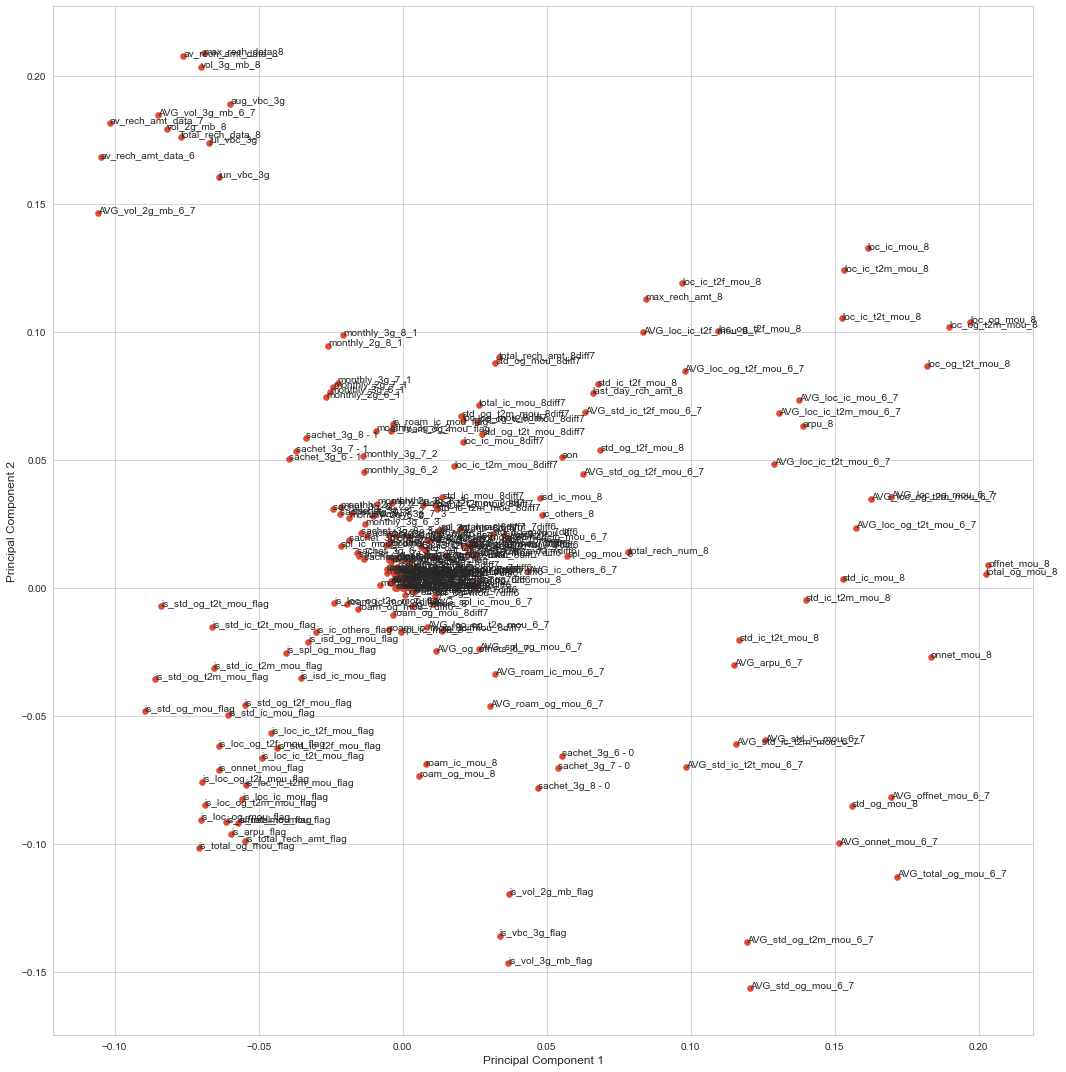

In [98]:
fig = plt.figure(figsize = (15,15))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [99]:
pca.explained_variance_ratio_

array([7.00098569e-02, 5.39486736e-02, 3.64677788e-02, 2.69406418e-02,
       2.23093591e-02, 1.85081654e-02, 1.81407779e-02, 1.40288235e-02,
       1.35533074e-02, 1.31693964e-02, 1.24547078e-02, 1.19398669e-02,
       1.18005924e-02, 1.12875892e-02, 1.11149034e-02, 1.03218766e-02,
       1.02016333e-02, 9.89406397e-03, 9.79835401e-03, 9.39269452e-03,
       9.26517517e-03, 8.88411369e-03, 8.67204912e-03, 8.36110507e-03,
       8.12560235e-03, 8.08907205e-03, 7.87158938e-03, 7.79359416e-03,
       7.73143033e-03, 7.46293411e-03, 7.41936055e-03, 7.26156166e-03,
       7.21327348e-03, 7.09126188e-03, 7.02537278e-03, 6.93080612e-03,
       6.80652882e-03, 6.74791141e-03, 6.65524456e-03, 6.61444414e-03,
       6.45735283e-03, 6.39758473e-03, 6.33468419e-03, 6.24676677e-03,
       6.14876685e-03, 6.06003610e-03, 5.98926629e-03, 5.98113738e-03,
       5.81121988e-03, 5.74279038e-03, 5.67679558e-03, 5.63346575e-03,
       5.56505631e-03, 5.48068980e-03, 5.36667491e-03, 5.29143026e-03,
      

Making the screeplot - plotting the cumulative variance against the number of components

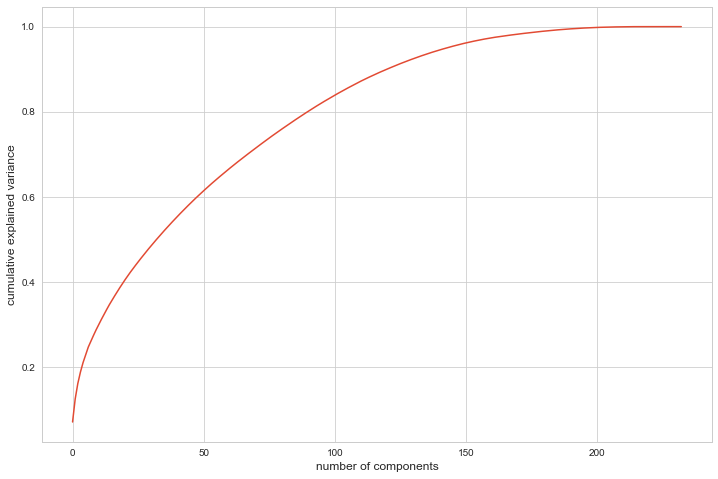

In [100]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [101]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [7.  5.4 3.6 2.7 2.2 1.9 1.8 1.4 1.4 1.3 1.2 1.2 1.2 1.1 1.1 1.  1.  1.
 1.  0.9 0.9 0.9 0.9 0.8 0.8 0.8 0.8 0.8 0.8 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4
 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]


In [102]:
print (pca.explained_variance_ratio_.cumsum())

[0.07000986 0.12395853 0.16042631 0.18736695 0.20967631 0.22818448
 0.24632525 0.26035408 0.27390738 0.28707678 0.29953149 0.31147136
 0.32327195 0.33455954 0.34567444 0.35599632 0.36619795 0.37609201
 0.38589037 0.39528306 0.40454824 0.41343235 0.4221044  0.43046551
 0.43859111 0.44668018 0.45455177 0.46234536 0.47007679 0.47753973
 0.48495909 0.49222065 0.49943392 0.50652519 0.51355056 0.52048136
 0.52728789 0.5340358  0.54069105 0.54730549 0.55376285 0.56016043
 0.56649512 0.57274188 0.57889065 0.58495069 0.59093995 0.59692109
 0.60273231 0.6084751  0.61415189 0.61978536 0.62535042 0.63083111
 0.63619778 0.64148921 0.64674627 0.65193162 0.65710969 0.66222939
 0.66727786 0.67230843 0.6772557  0.68211812 0.6869621  0.69178192
 0.69654741 0.70127072 0.70598363 0.71068139 0.71534944 0.7199604
 0.72455392 0.72913002 0.73368524 0.73821124 0.74269279 0.7470999
 0.75146338 0.755814   0.76011906 0.76439366 0.76864749 0.77289319
 0.77708742 0.78124242 0.7853768  0.78948573 0.79353954 0.797560

Using incremental PCA for efficiency - saves a lot of time on larger datasets

In [123]:
pca_final = IncrementalPCA(n_components=54)

In [124]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(24000, 54)

Creating correlation matrix for the principal components

In [125]:
corrmat = np.corrcoef(df_train_pca.transpose())

Plotting the correlation matrix

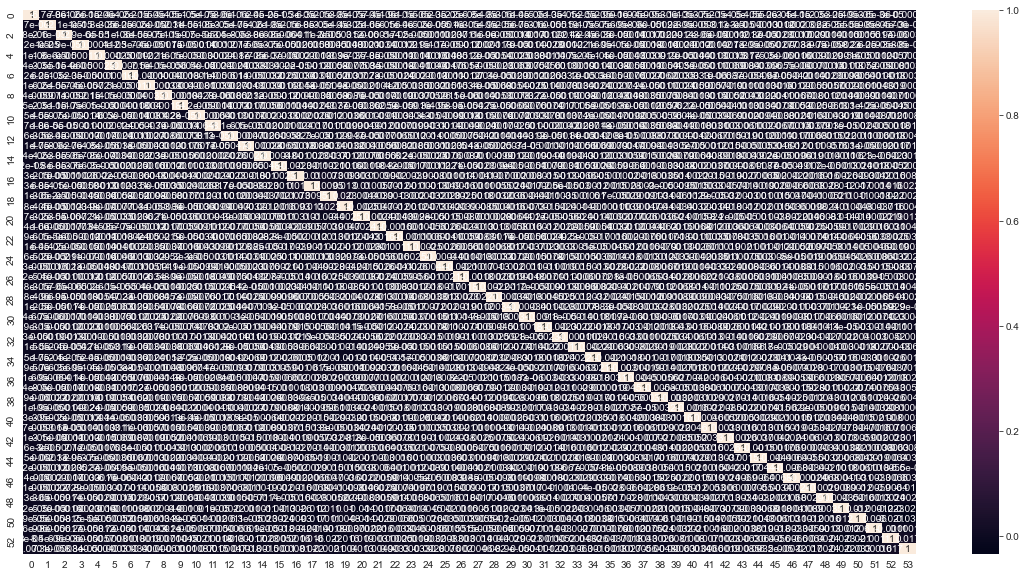

In [126]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

1s -> 0s in diagonals

We see that correlations are indeed very close to 0

In [127]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.023318196771035367 , min corr:  -0.03331421185309793


Applying selected components to the test data

In [128]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(6001, 54)

Training the model on the train data

In [129]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

Making prediction on the test data

In [130]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.9'

In [131]:
def plotLiftChart(actual, predicted,title_str):
    df_dict = {'actual': list (actual), 'pred': list(predicted)}
    df = pd.DataFrame(df_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    plt.title(title_str)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']),
             color='darkorange', lw=2, label='Prediction')
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']),
             color='navy', lw=2, linestyle='--', label='Actual')
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    from pylab import rcParams
    rcParams['figure.figsize'] = 20, 10

    plt.legend(loc="best")
    plt.show()

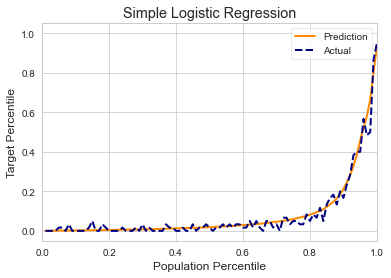

In [132]:
plotLiftChart(y_test.values,pred_probs_test,"Simple Logistic Regression")

In [133]:
pca_last1 = PCA(n_components=48)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(6001, 48)

In [134]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(6001, 15)

Training the regression model :

In [135]:
learner_pca2 = LogisticRegression(class_weight = 'balanced')
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

Making prediction on the test data

In [136]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test2))

'0.90'

In [137]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=9999,solver='newton-cg',C=10000000,n_jobs=-1)

In [138]:
logmodel_CW_dict.fit(df_train_pca,y_train)

LogisticRegression(C=10000000, class_weight='balanced', n_jobs=-1,
                   random_state=9999, solver='newton-cg')

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5532
           1       0.32      0.82      0.46       469

    accuracy                           0.85      6001
   macro avg       0.65      0.83      0.68      6001
weighted avg       0.93      0.85      0.88      6001

Accuracy for the test dataset 84.7%
ROC for the test dataset 83.4%


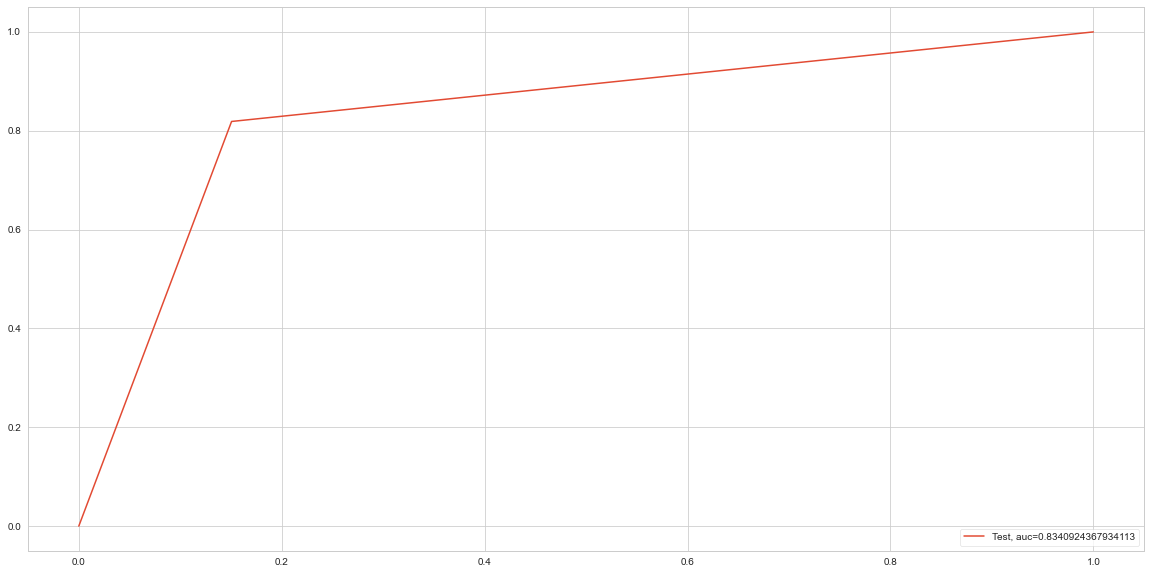

In [139]:
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

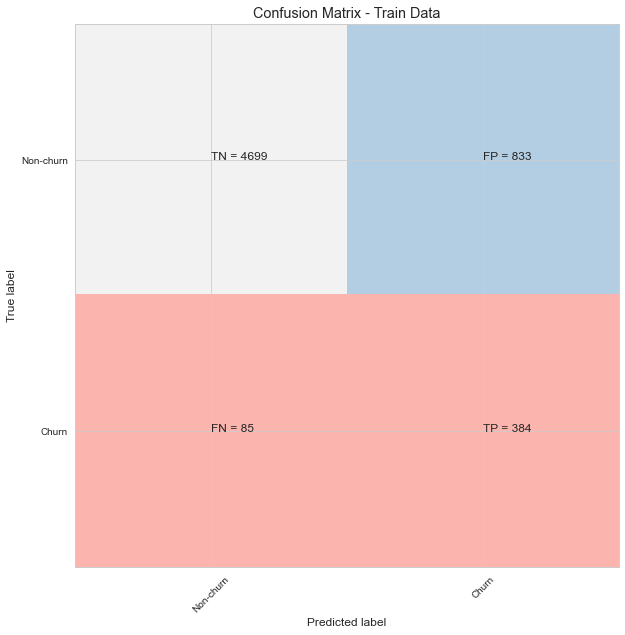

In [140]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

Lift Metrics :

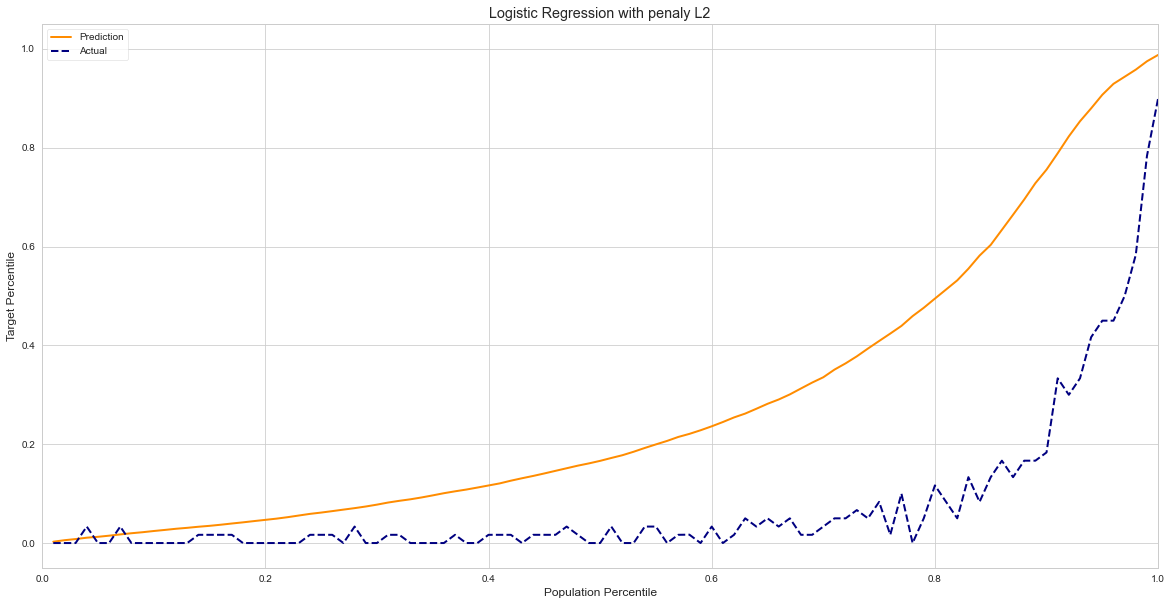

In [141]:
plotLiftChart(y_test.values,prediction_probs,"Logistic Regression with penaly L2")

### Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
RFC_balanced = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None,
                                      min_samples_split=500, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=1e-07,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=9999, verbose=0, warm_start=False, 
                                      class_weight="balanced_subsample")

In [143]:
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5532
           1       0.35      0.74      0.47       469

    accuracy                           0.87      6001
   macro avg       0.66      0.81      0.70      6001
weighted avg       0.93      0.87      0.89      6001

Accuracy for the test dataset 87.1%
ROC for the test dataset 88.8%


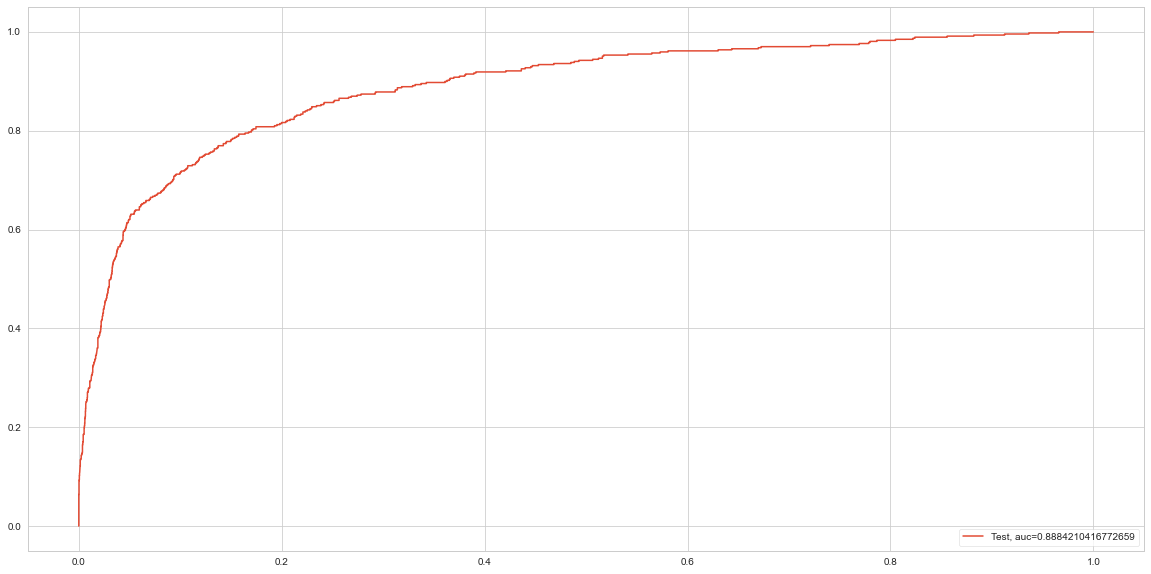

In [144]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_probs_RFC)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

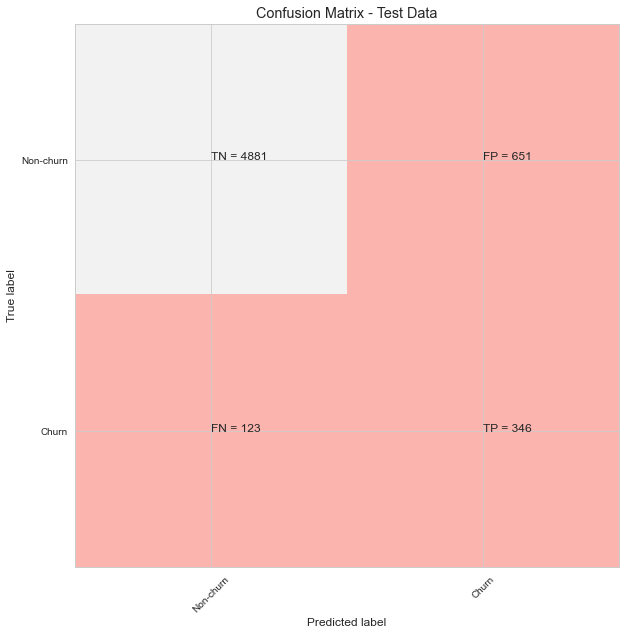

In [145]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

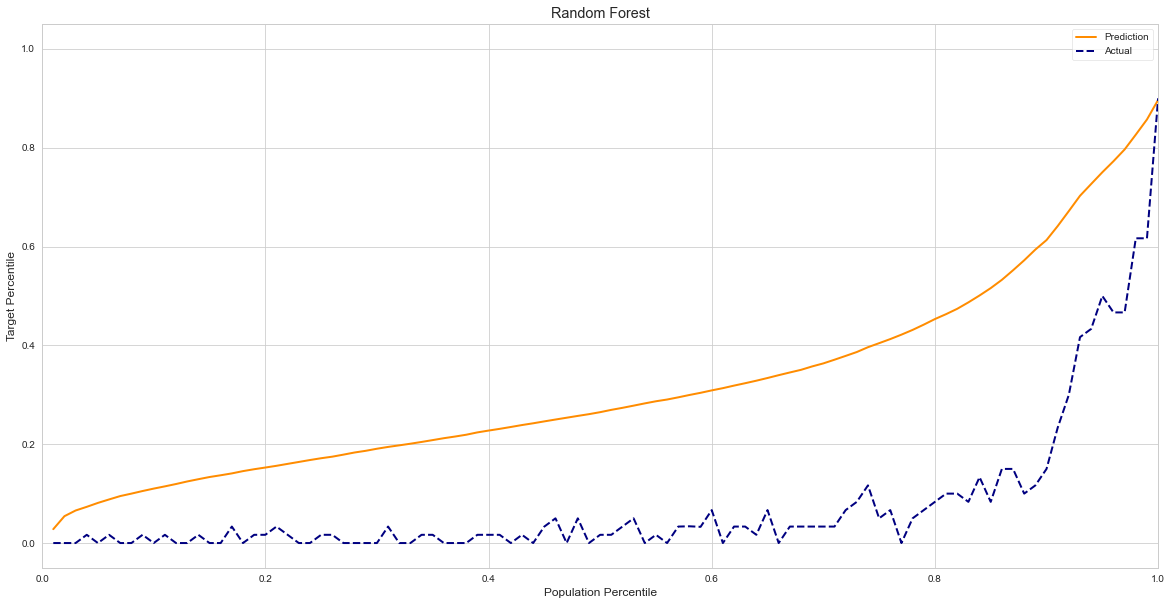

In [146]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest")

In [147]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

colName               value
0   0.245235      std_og_t2o_mou
1   0.151347         onnet_mou_8
2   0.075370    loc_og_t2t_mou_8
3   0.072596      loc_og_t2o_mou
4   0.041647    loc_ic_t2f_mou_8
5   0.039121              arpu_8
6   0.033537      loc_ic_t2o_mou
7   0.025433        offnet_mou_8
8   0.023167    loc_og_t2f_mou_8
9   0.019377    loc_ic_t2m_mou_8
10  0.016399    std_og_t2c_mou_8
11  0.014776    loc_ic_t2t_mou_8
12  0.014404  last_day_rch_amt_8
13  0.014236    loc_og_t2m_mou_8
14  0.014160        std_og_mou_8
15  0.012797   total_rech_data_8
16  0.010173                 aon
17  0.009928        loc_og_mou_8
18  0.009415    loc_og_t2c_mou_8
19  0.009384    std_ic_t2m_mou_8
20  0.008908    std_ic_t2f_mou_8
21  0.008792    std_og_t2f_mou_8
22  0.007854        isd_og_mou_8
23  0.007479        loc_ic_mou_8
24  0.006806          jun_vbc_3g
25  0.006253        std_ic_mou_8
26  0.005971    std_ic_t2o_mou_8
27  0.005959        spl_ic_mou_8
28  0.005953         vol_2g_mb_8
29  0.005890        spl_og_mou_8
30  0.005673       roam_ic_mou_8
31  0.004652      monthly_2g_7_1
32  0.004539       roam_og_mou_8
33  0.004479      monthly_2g_6_4
34  0.004399      monthly_2g_6_3
35  0.004064    total_rech_num_8
36  0.003946      max_rech_amt_8
37  0.003827  av_rech_amt_data_6
38  0.003793  av_rech_amt_data_7
39  0.003765         vol_3g_mb_8
40  0.003606      monthly_2g_7_4
41  0.003545          aug_vbc_3g
42  0.003210        isd_ic_mou_8
43  0.003160          jul_vbc_3g
44  0.003073         og_others_8
45  0.002874      monthly_2g_7_2
46  0.002694    std_ic_t2t_mou_8
47  0.002676     max_rech_data_8
48  0.002389      monthly_2g_6_1
49  0.002101  av_rech_amt_data_8
50  0.001566      monthly_2g_7_3
51  0.001398      total_og_mou_8
52  0.001337         ic_others_8
53  0.000868      monthly_2g_6_2

### Gradient boosting : 

In [149]:
params = {'n_estimators': 200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 10, 'random_state': 9999}
GBC = ensemble.GradientBoostingClassifier(**params)

In [150]:
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=10,
                           n_estimators=200, random_state=9999, subsample=0.5)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5532
           1       0.78      0.32      0.45       469

    accuracy                           0.94      6001
   macro avg       0.86      0.66      0.71      6001
weighted avg       0.93      0.94      0.93      6001

Accuracy for the test dataset 94.0%
ROC for the test dataset 88.8%


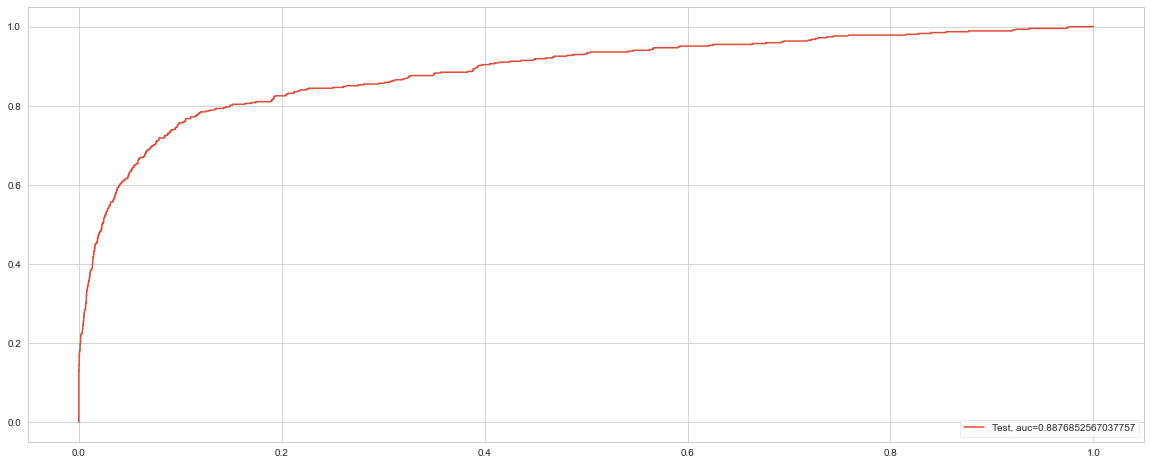

In [151]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = roc_curve(y_test, preds_probs_GBC)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

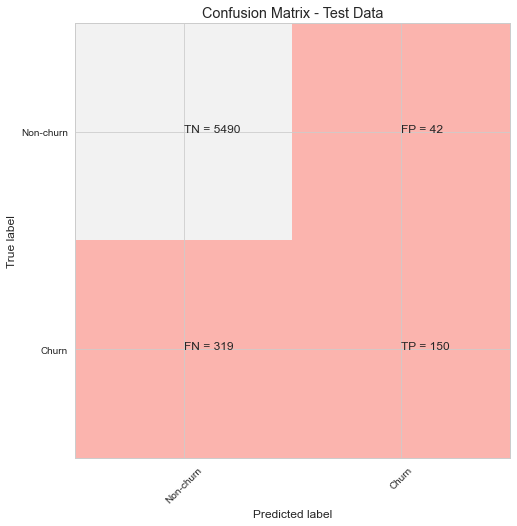

In [152]:
cm = confusion_matrix(y_test, preds_GBC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

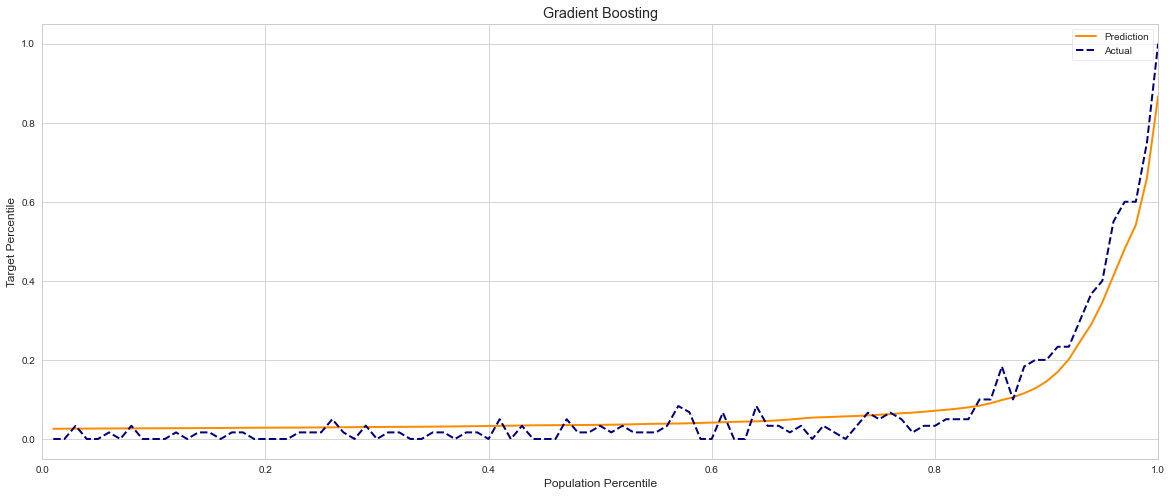

In [153]:
plotLiftChart(y_test.values,preds_probs_GBC,"Gradient Boosting")

#### Gradient boosting hyper parameter tuning : 

In [154]:
#Change in estimator and max_depth
from sklearn.model_selection import GridSearchCV   #Performing grid search

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,cv=None,verbose=2)

In [155]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5070           0.0303           11.55s
         2           0.5307           0.0212           11.40s
         3           0.4972           0.0149           11.37s
         4           0.4841           0.0139           11.36s
         5           0.4347           0.0136           11.23s
         6           0.4326           0.0097           11.16s
         7           0.4485           0.0091           10.96s
         8           0.4494           0.0080           10.80s
         9           0.4292           0.0077           10.72s
        10           0.4236           0.0066           10.62s
        11           0.3959           0.0060           10.50s
        12           0.4091           0.0066           10.39s
        13           0.4125           0.0034           10.37s
        14           0.3981           0.0034           10.29s
        15           0.3662           0.0038           10.19s
       

       136           0.2885          -0.0000            3.52s
       137           0.2867          -0.0000            3.47s
       138           0.2710          -0.0000            3.41s
       139           0.2733          -0.0000            3.36s
       140           0.2790          -0.0001            3.30s
       141           0.2928          -0.0003            3.25s
       142           0.2800          -0.0001            3.19s
       143           0.2975          -0.0003            3.14s
       144           0.3030          -0.0000            3.08s
       145           0.2757          -0.0003            3.03s
       146           0.2725          -0.0002            2.97s
       147           0.3103          -0.0001            2.91s
       148           0.2959          -0.0001            2.86s
       149           0.3120          -0.0005            2.81s
       150           0.2746          -0.0001            2.75s
       151           0.2591          -0.0001            2.70s
       1

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 8),
                         'n_estimators': range(200, 500, 100)},
             scoring='roc_auc', verbose=2)

In [156]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'n_estimators': 200}, 0.9002974384339424)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5532
           1       0.67      0.46      0.55       469

    accuracy                           0.94      6001
   macro avg       0.81      0.72      0.76      6001
weighted avg       0.93      0.94      0.93      6001

Accuracy for the test dataset 94.0%
ROC for the test dataset 90.4%


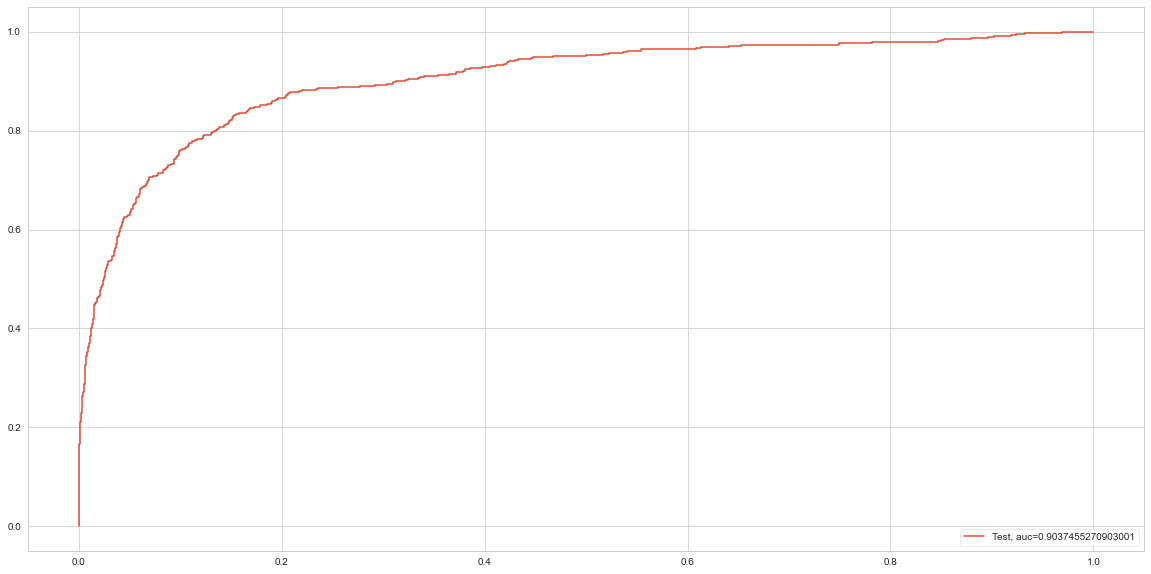

In [157]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

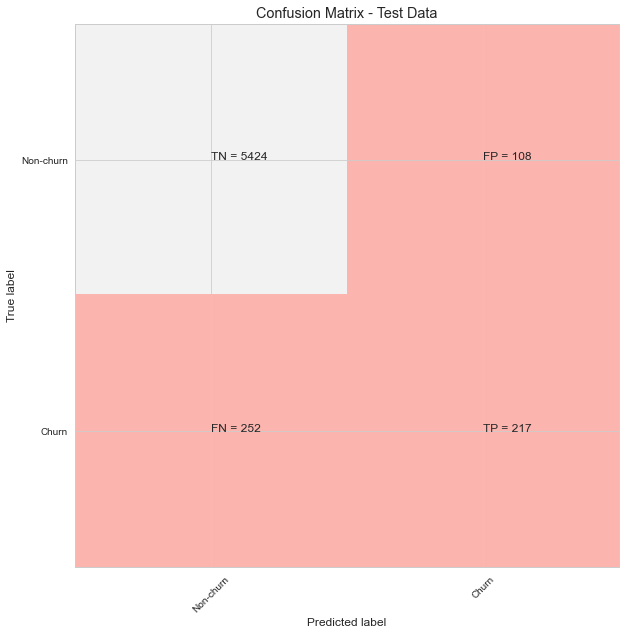

In [158]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

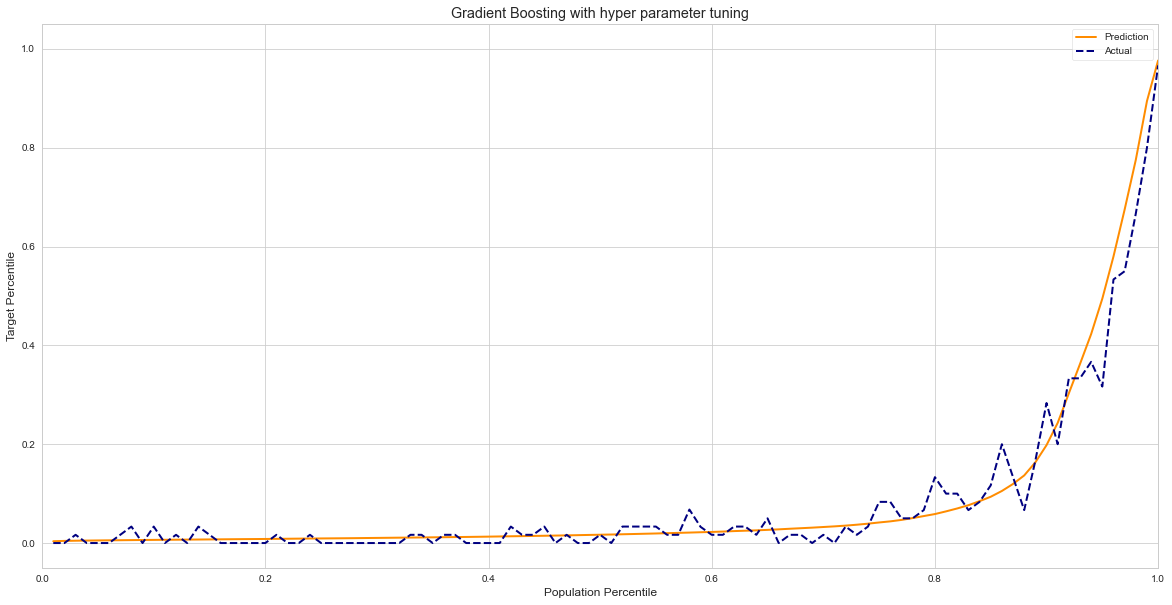

In [159]:
plotLiftChart(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")

In [160]:
#Change in min sample leaf

param_test = {'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = ensemble.GradientBoostingClassifier(
        n_estimators = 100,
        learning_rate=0.05,
        max_depth = 5,
        min_samples_split=100,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,cv=None,verbose=2)

In [161]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   20.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   24.2s finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5270           0.0197            4.80s
         2           0.5581           0.0186            4.75s
         3           0.5224           0.0147            4.67s
         4           0.5123           0.0120            4.63s
         5           0.4611           0.0108            4.62s
         6           0.4553           0.0103            4.69s
         7           0.4752           0.0101            4.65s
         8           0.4743           0.0085            4.58s
         9           0.4558           0.0062            4.51s
        10           0.4467           0.0063            4.51s
        11           0.4206           0.0061            4.46s
        12           0.4454           0.0060            4.38s
        13           0.4457           0.0038            4.33s
        14           0.4254           0.0039            4.27s
        15           0.4014           0.0031            4.22s
       

GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_depth=5,
                                                  min_samples_split=100,
                                                  random_state=9999,
                                                  subsample=0.1, verbose=2),
             n_jobs=-1, param_grid={'min_samples_leaf': range(10, 100, 20)},
             scoring='roc_auc', verbose=2)

In [162]:
gsearch1.best_params_, gsearch1.best_score_

({'min_samples_leaf': 90}, 0.9034872709990858)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5532
           1       0.68      0.44      0.54       469

    accuracy                           0.94      6001
   macro avg       0.82      0.71      0.75      6001
weighted avg       0.93      0.94      0.93      6001

Accuracy for the test dataset 94.1%
ROC for the test dataset 90.1%


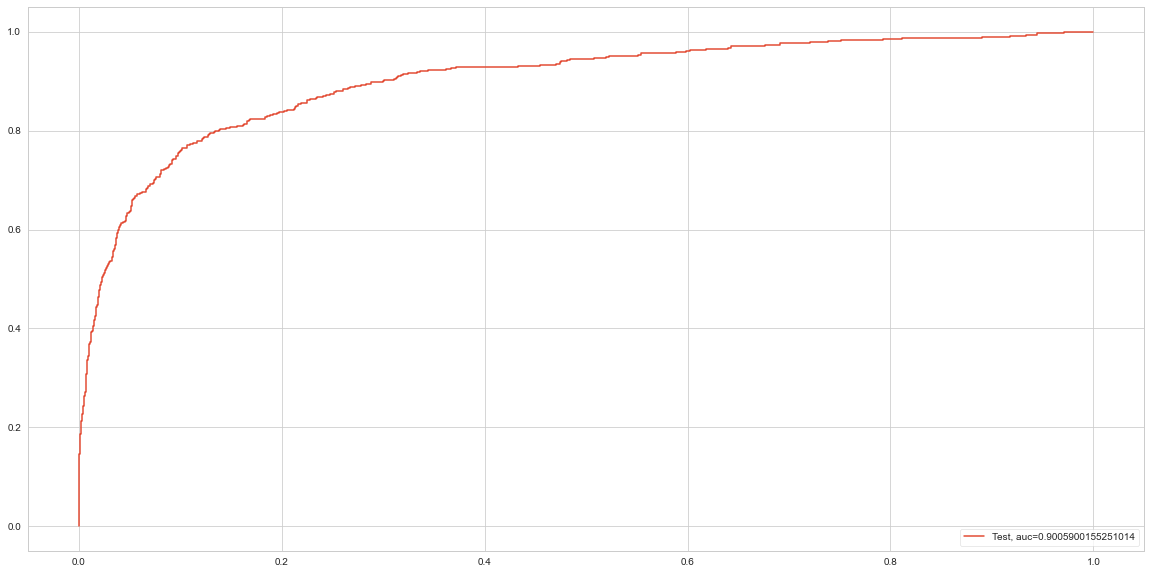

In [163]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

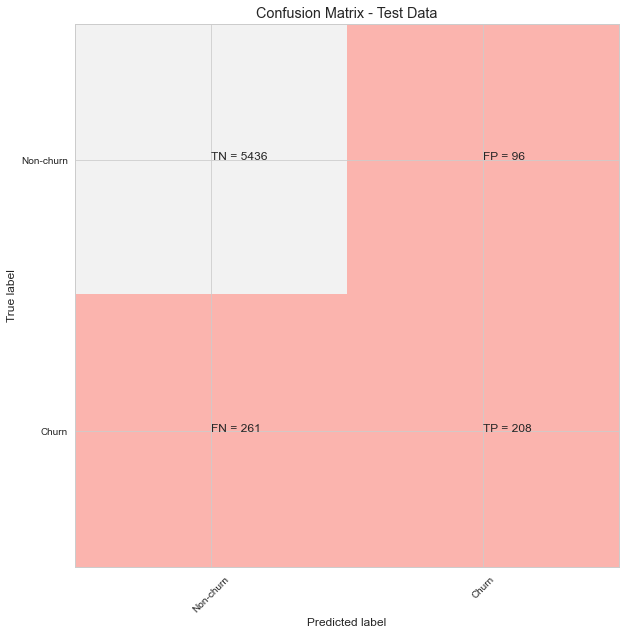

In [164]:
cm = confusion_matrix(y_test, preds_GBC_HT)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

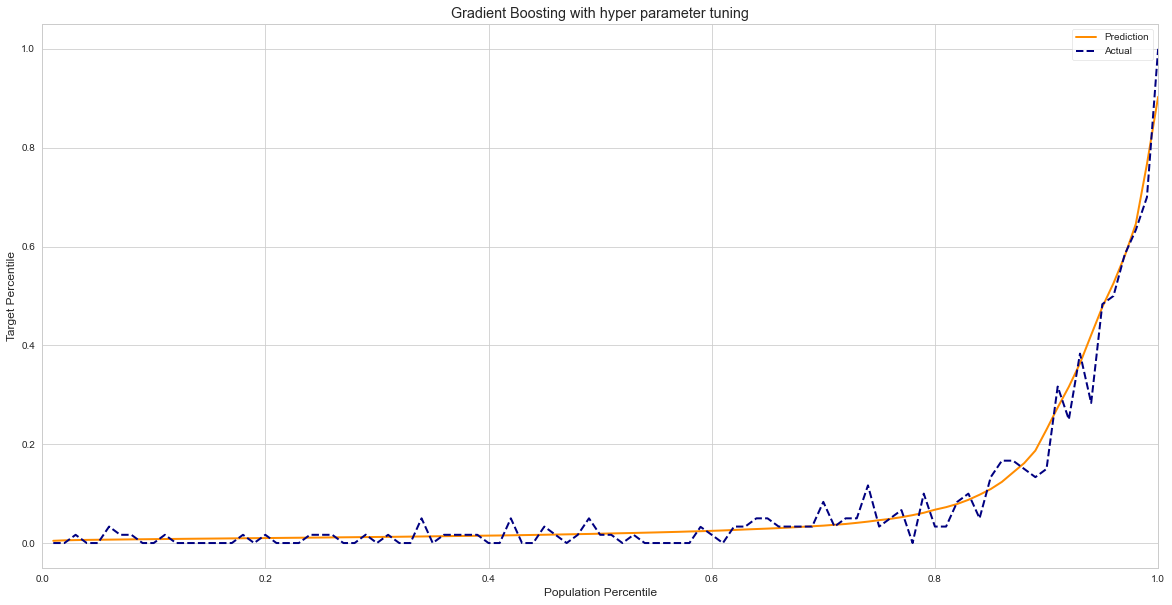

In [165]:
plotLiftChart(y_test.values,preds_GBC_probs_HT,"Gradient Boosting with hyper parameter tuning")

### Support Vector Machine

In [166]:
from sklearn import svm 

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5532
           1       0.91      0.30      0.45       469

    accuracy                           0.94      6001
   macro avg       0.93      0.65      0.71      6001
weighted avg       0.94      0.94      0.93      6001

Accuracy for the test dataset 94.3%
ROC for the test dataset 64.8%


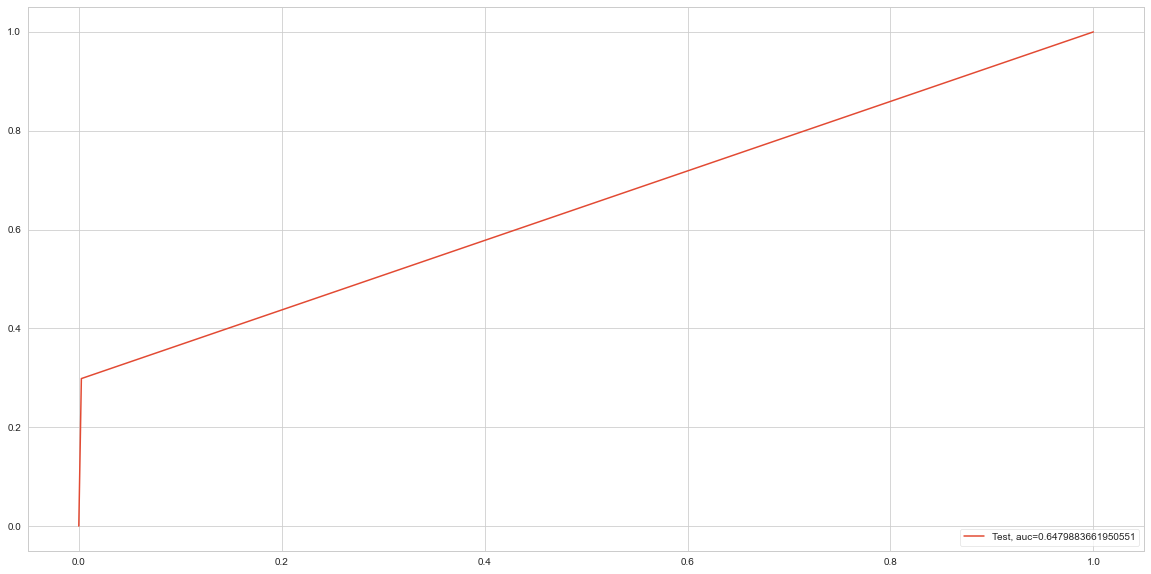

In [167]:
preds_SVM_lin = svm_linear.predict(X_test)
#preds_SVM_lin_probs = svm_linear.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_lin))
accuracy = accuracy_score(y_test, preds_SVM_lin)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_SVM_lin)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

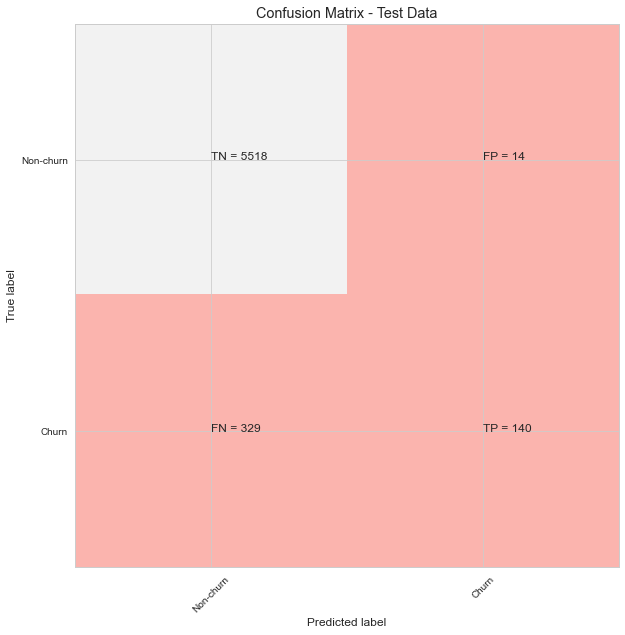

In [168]:
cm = confusion_matrix(y_test, preds_SVM_lin)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

#### SVM with non linear kernel :

In [169]:
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5532
           1       0.80      0.41      0.54       469

    accuracy                           0.95      6001
   macro avg       0.88      0.70      0.76      6001
weighted avg       0.94      0.95      0.94      6001

Accuracy for the test dataset 94.6%
ROC for the test dataset 70.1%


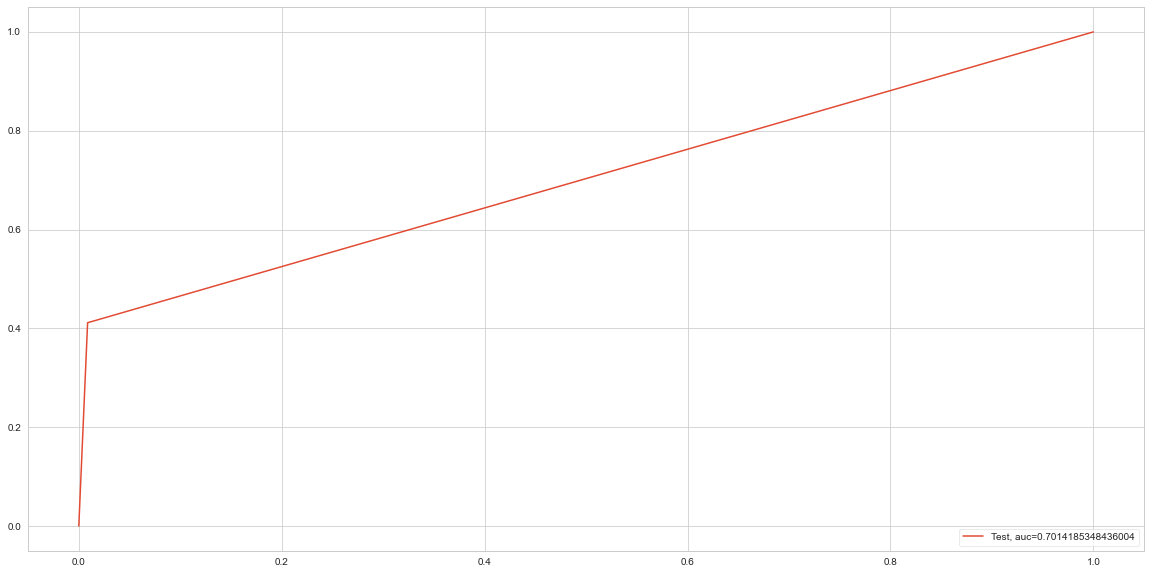

In [170]:
preds_SVM_rbf = svm_rbf.predict(X_test)
#preds_SVM_rbf_probs = svm_rbf.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_SVM_rbf))
accuracy = accuracy_score(y_test, preds_SVM_rbf)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_SVM_rbf)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

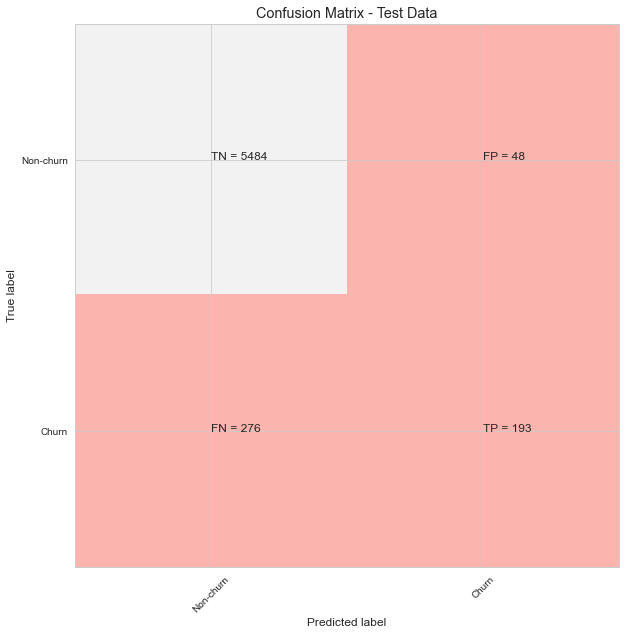

In [171]:
cm = confusion_matrix(y_test, preds_SVM_rbf)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

### Adaptive boosting (Adaboost)

In [172]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)
# test error
y_pred = shallow_tree.predict(X_test)
score = accuracy_score(y_test, y_pred)
score

0.9438426928845193

Adaboost with the tree as base estimator

In [173]:
estimators = list(range(50, 100, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [175]:
abc_scores

[0.9415097483752708,
 0.9421763039493418,
 0.9425095817363772,
 0.9428428595234127,
 0.943342776203966,
 0.9431761373104482,
 0.9441759706715548,
 0.9425095817363772,
 0.944009331778037,
 0.942676220629895,
 0.9435094150974838,
 0.944009331778037,
 0.9430094984169305,
 0.942676220629895,
 0.9430094984169305,
 0.940676553907682,
 0.9388435260789868]

After seeing the above score we can say that adaboost is providing better results when estimate is 68

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5532
           1       0.68      0.54      0.60       469

    accuracy                           0.94      6001
   macro avg       0.82      0.76      0.78      6001
weighted avg       0.94      0.94      0.94      6001

Accuracy for the test dataset 94.4%
ROC for the test dataset 75.7%


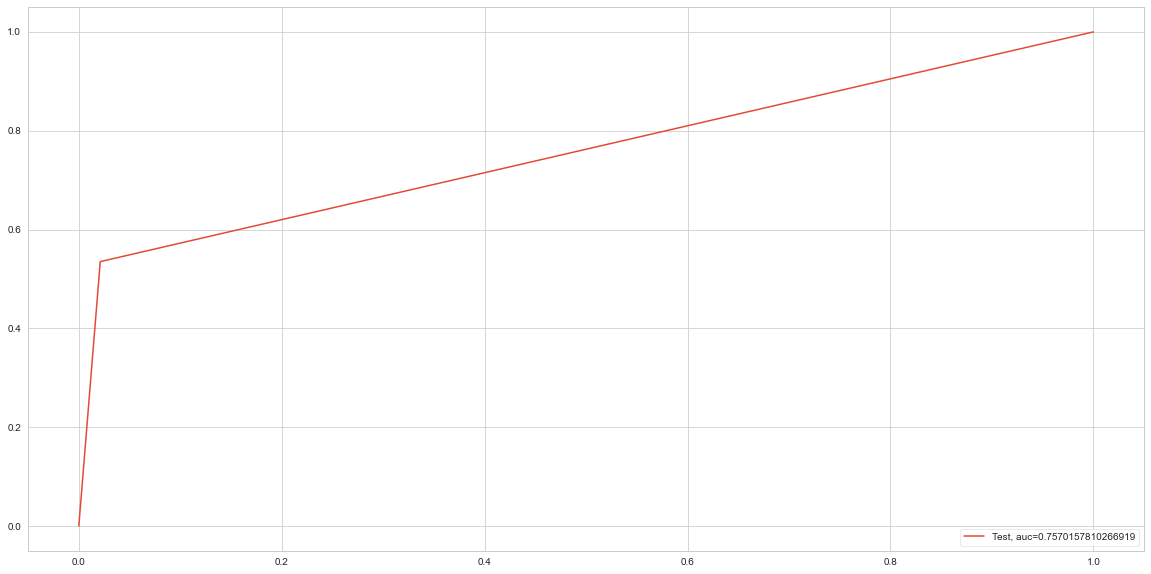

In [177]:
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 68)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Classification Report:")
print(classification_report(y_test,predictions))
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

Let's test on 100 trees

Accuracy for the test dataset 94.0%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5532
           1       0.64      0.52      0.57       469

    accuracy                           0.94      6001
   macro avg       0.80      0.75      0.77      6001
weighted avg       0.94      0.94      0.94      6001

ROC for the test dataset 74.7%


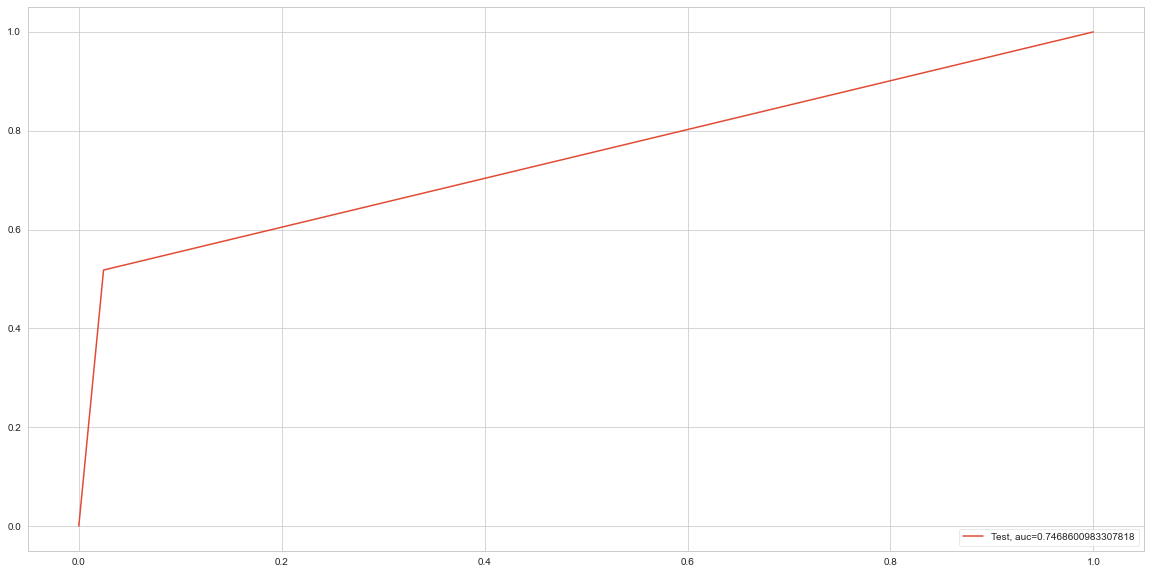

In [178]:
ABC = AdaBoostClassifier(
base_estimator=shallow_tree, 
    n_estimators = 100)
    
ABC.fit(X_train, y_train)
predictions = ABC.predict(X_test)
score = accuracy_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )
print(classification_report(y_test,predictions))
fpr, tpr, threshold = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

### Resampling techniques for balancing the data set :  

In [174]:
import xgboost as xgb
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = cv,
    scoring='f1_weighted'
)

xgb_model.fit(X=X_train,y=y_train)

In [195]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

Accuracy: 93.98%
Precision: 80.13%
Recall: 74.69%
F1 Score: 77.07%
F Beta score: 93.63%
Specificity: 97.56%
Sensitivty: 51.81%


In [179]:
def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [180]:
from sklearn.ensemble import RandomForestClassifier

RF2=RandomForestClassifier(max_features=94, n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')
RF2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=94, n_estimators=200,
                       random_state=111)

In [181]:
importances = RF2.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
RF_feature_importance.head()

colName                  value
0  0.130936         total_og_mou_8
1  0.069175     last_day_rch_amt_8
2  0.057727                 arpu_8
3  0.042485          roam_og_mou_8
4  0.038353  total_rech_amt_8diff7

In [182]:
# Random Over Sampling
from imblearn.over_sampling import SMOTE

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (24000, 233)
Number transactions y_train dataset:  (24000,)
Number transactions X_test dataset:  (6001, 233)
Number transactions y_test dataset:  (6001,)


In [183]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1972
Before OverSampling, counts of label '0': 22028 

After OverSampling, the shape of train_X: (44056, 233)
After OverSampling, the shape of train_y: (44056,) 

After OverSampling, counts of label '1': 22028
After OverSampling, counts of label '0': 22028


#### Logistics regression on resampling data

In [184]:
from sklearn.linear_model import LogisticRegressionCV

searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1    
    )

In [185]:
searchCV.fit(X_train_res,y_train_res)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   29.7s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     n_jobs=-1, random_state=777, scoring='roc_auc',
                     solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      5532
           1       0.38      0.83      0.52       469

    accuracy                           0.88      6001
   macro avg       0.68      0.86      0.73      6001
weighted avg       0.94      0.88      0.90      6001

Accuracy for the test dataset 88.2%
ROC for the test dataset 91.8%


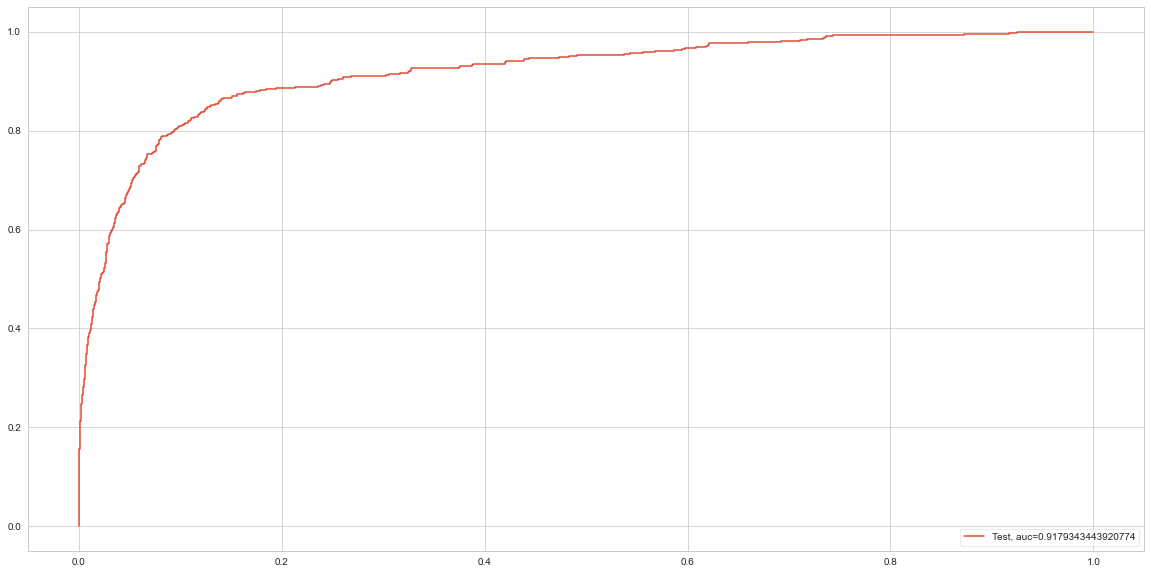

In [186]:
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_L2Search_probs)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

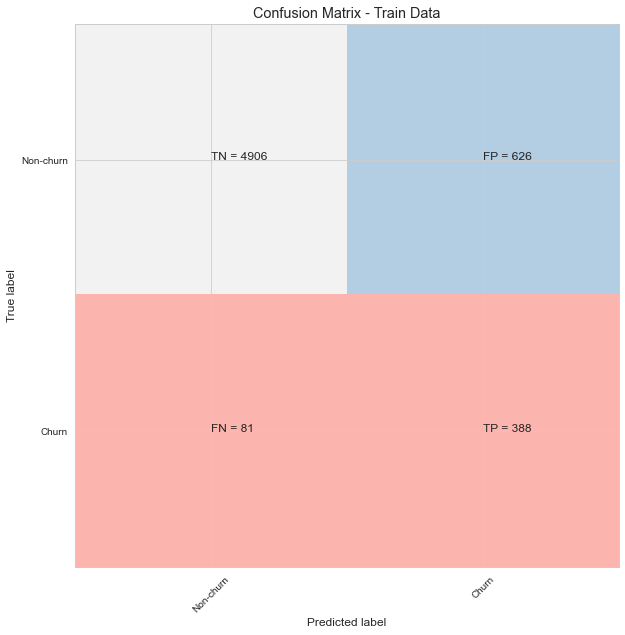

In [187]:
cm = confusion_matrix(y_test, preds_L2Search)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

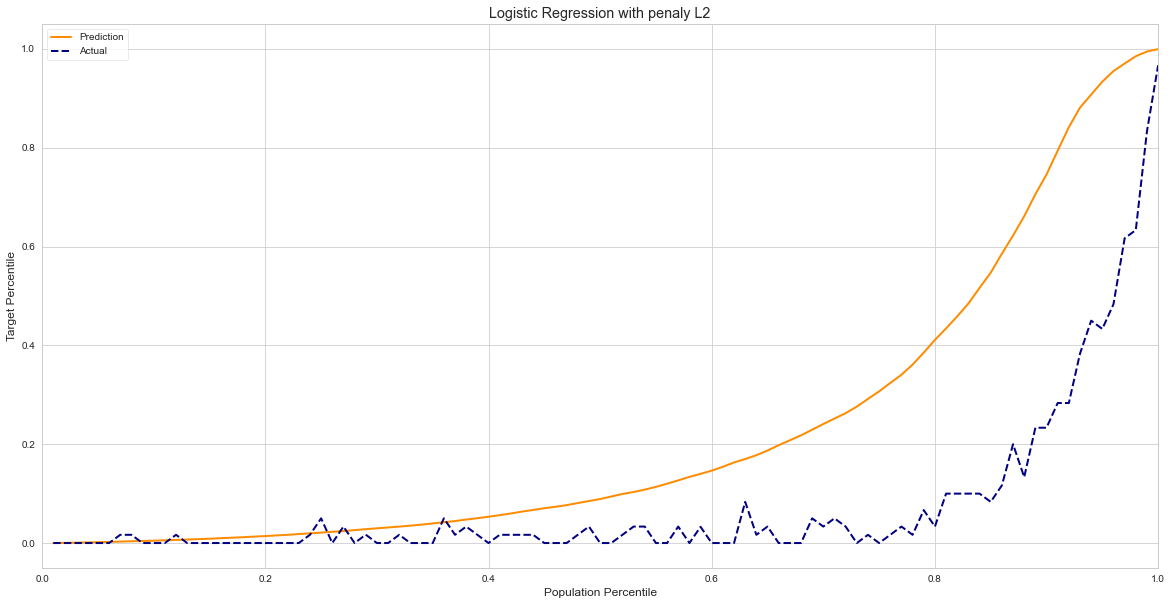

In [188]:
plotLiftChart(y_test.values,preds_L2Search_probs,"Logistic Regression with penaly L2")

#### Random Forest on resampling data

In [189]:
TrainedRFC= RFC_balanced.fit(X_train_res,y_train_res,)

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      5532
           1       0.47      0.74      0.58       469

    accuracy                           0.92      6001
   macro avg       0.73      0.84      0.77      6001
weighted avg       0.94      0.92      0.92      6001

Accuracy for the test dataset 91.6%
ROC for the test dataset 92.3%


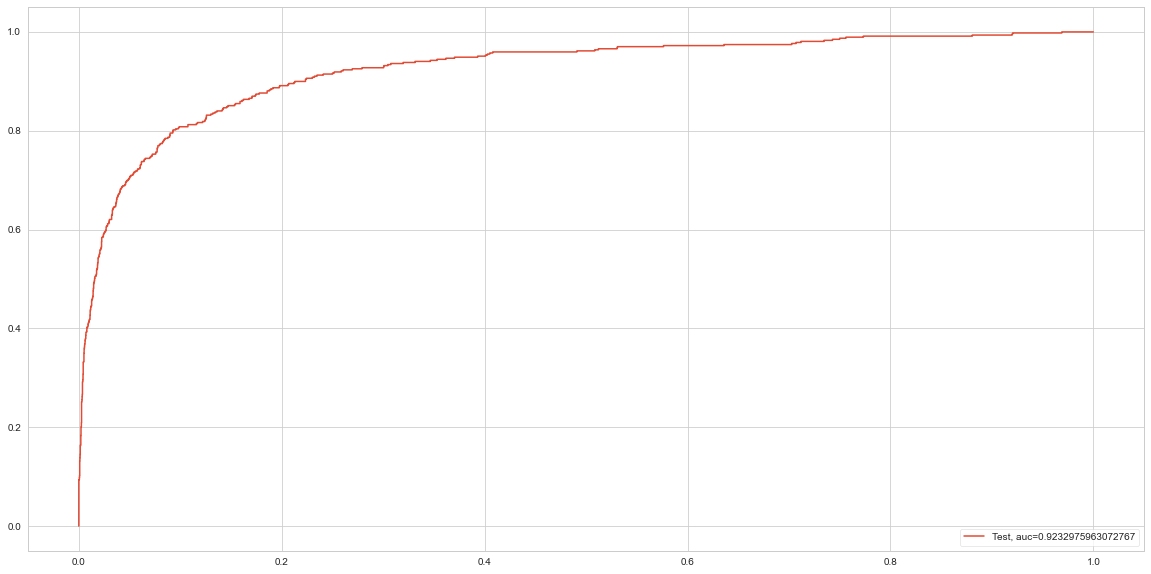

In [190]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = roc_curve(y_test, preds_probs_RFC)
roc_auc = auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

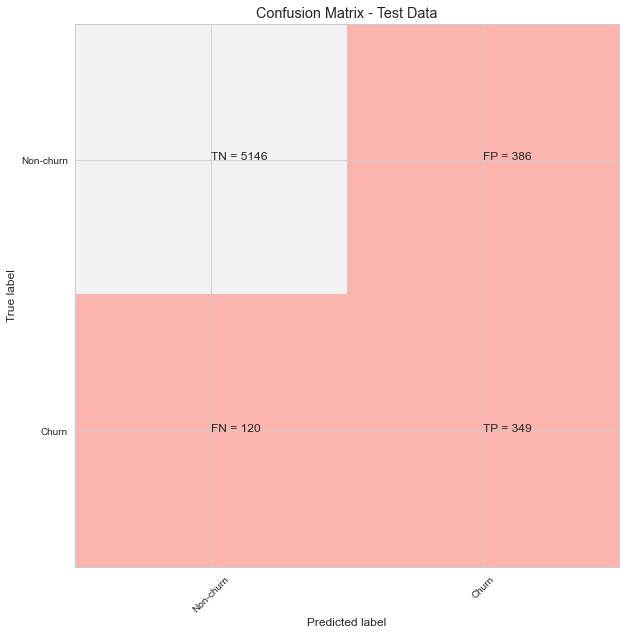

In [191]:
cm = confusion_matrix(y_test, preds_RFC)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

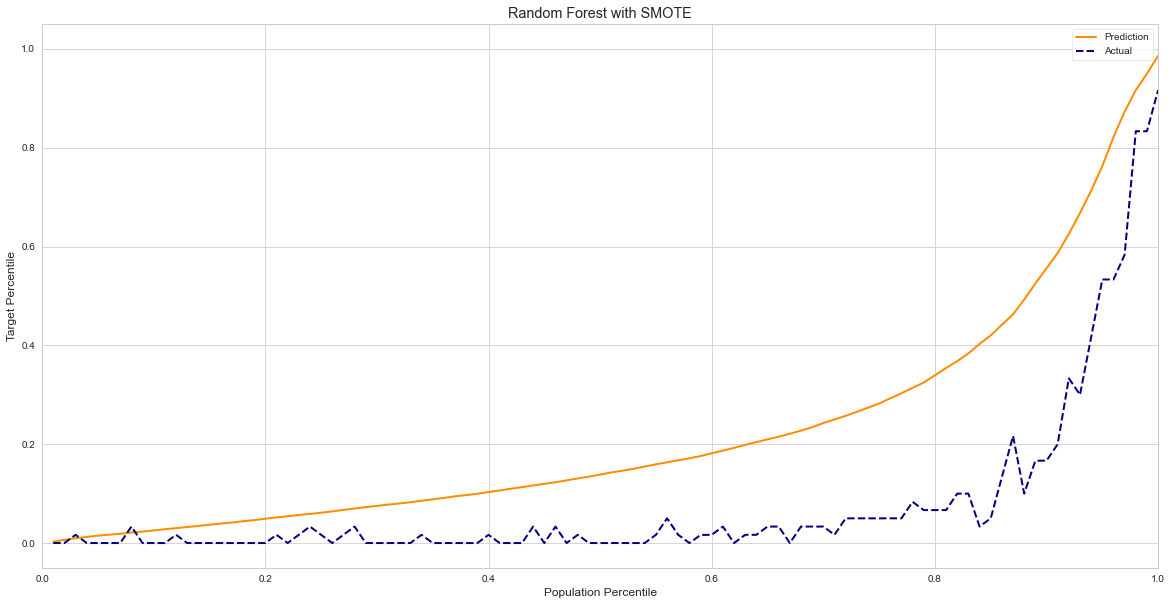

In [192]:
plotLiftChart(y_test.values,preds_probs_RFC,"Random Forest with SMOTE")

In [193]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

colName                   value
0    6.126257e-02           roam_og_mou_8
1    6.049408e-02    is_total_ic_mou_flag
2    5.647016e-02     total_ic_mou_8diff7
3    5.303157e-02      last_day_rch_amt_8
4    4.984435e-02          total_og_mou_8
5    4.158886e-02        loc_og_t2m_mou_8
6    3.991394e-02    is_total_og_mou_flag
7    3.268160e-02             vol_2g_mb_8
8    3.127502e-02        total_rech_num_8
9    3.008389e-02        loc_og_t2t_mou_8
10   2.850808e-02            loc_ic_mou_8
11   2.838964e-02                  arpu_8
12   2.712054e-02           roam_ic_mou_8
13   2.474848e-02  is_loc_ic_t2t_mou_flag
14   2.441110e-02              aug_vbc_3g
15   2.164585e-02       is_vol_2g_mb_flag
16   2.090758e-02            spl_ic_mou_8
17   1.981295e-02      av_rech_amt_data_8
18   1.930501e-02          max_rech_amt_8
19   1.817316e-02             vol_3g_mb_8
20   1.801767e-02       std_og_mou_8diff7
21   1.745703e-02   total_rech_amt_8diff7
22   1.564017e-02       spl_ic_mou_8diff7
23   1.469193e-02        loc_ic_t2m_mou_8
24   1.376032e-02      is_spl_ic_mou_flag
25   1.207060e-02       total_rech_data_8
26   1.094363e-02        loc_ic_t2t_mou_8
27   9.521653e-03  is_loc_og_t2m_mou_flag
28   9.327474e-03         max_rech_data_8
29   8.392266e-03     is_roam_og_mou_flag
30   7.921569e-03      av_rech_amt_data_7
31   7.818885e-03            loc_og_mou_8
32   7.681835e-03  is_loc_ic_t2m_mou_flag
33   7.459097e-03      roam_og_mou_8diff7
34   5.726960e-03      is_std_og_mou_flag
35   4.867488e-03     is_roam_ic_mou_flag
36   4.685859e-03   total_rech_amt_7diff6
37   4.482604e-03        loc_ic_t2f_mou_8
38   4.311143e-03          monthly_2g_7_1
39   4.233114e-03     AVG_roam_og_mou_6_7
40   3.743544e-03  is_loc_og_t2f_mou_flag
41   3.743323e-03            std_ic_mou_8
42   3.398962e-03  AVG_std_ic_t2t_mou_6_7
43   3.223114e-03      is_loc_ic_mou_flag
44   2.987874e-03        std_ic_t2f_mou_8
45   2.946962e-03      roam_ic_mou_8diff7
46   2.910043e-03       spl_ic_mou_7diff6
47   2.867413e-03      is_loc_og_mou_flag
48   2.680659e-03   loc_ic_t2m_mou_8diff7
49   2.642974e-03   loc_og_t2t_mou_8diff7
50   2.559323e-03   std_og_t2t_mou_8diff7
51   2.506204e-03       AVG_vol_2g_mb_6_7
52   2.315296e-03  is_std_og_t2m_mou_flag
53   2.315257e-03        std_og_t2f_mou_8
54   2.224567e-03  AVG_loc_og_t2m_mou_6_7
55   2.053895e-03            offnet_mou_8
56   2.024152e-03  is_loc_og_t2t_mou_flag
57   1.976700e-03      is_std_ic_mou_flag
58   1.959672e-03       AVG_og_others_6_7
59   1.933738e-03        vol_3g_mb_8diff7
60   1.925192e-03      AVG_loc_ic_mou_6_7
61   1.884885e-03        std_ic_t2m_mou_8
62   1.855102e-03            is_arpu_flag
63   1.796741e-03       loc_ic_mou_8diff7
64   1.762092e-03      is_spl_og_mou_flag
65   1.745390e-03  AVG_std_og_t2f_mou_6_7
66   1.707646e-03        og_others_8diff7
67   1.628117e-03        loc_og_t2f_mou_8
68   1.597447e-03   loc_og_t2f_mou_8diff7
69   1.520756e-03  is_std_ic_t2m_mou_flag
70   1.477729e-03  AVG_loc_og_t2f_mou_6_7
71   1.462691e-03  AVG_loc_ic_t2m_mou_6_7
72   1.461770e-03  AVG_loc_og_t2c_mou_6_7
73   1.428121e-03      is_offnet_mou_flag
74   1.254784e-03      roam_og_mou_7diff6
75   1.221478e-03       isd_og_mou_8diff7
76   1.204665e-03        std_ic_t2t_mou_8
77   1.181208e-03  is_std_ic_t2t_mou_flag
78   1.156858e-03  is_loc_ic_t2f_mou_flag
79   1.139901e-03      AVG_std_og_mou_6_7
80   1.028094e-03        loc_og_t2c_mou_8
81   1.020390e-03      AVG_spl_og_mou_6_7
82   1.015674e-03              jun_vbc_3g
83   1.012500e-03             onnet_mou_8
84   1.002241e-03                     aon
85   9.820772e-04       AVG_ic_others_6_7
86   9.608200e-04             ic_others_8
87   9.495323e-04       is_onnet_mou_flag
88   9.037813e-04           vbc_3g_8diff7
89   8.832716e-04  is_loc_og_t2c_mou_flag
90   8.647649e-04      AVG_spl_ic_mou_6_7
91   8.645399e-04   std_og_t2m_mou_8diff7
92   8.592259e-04  is_std_ic_t2f_mou_flag
93   8.148662e-04     AVG_roam_ic_mou_6_7
94   7.826986e-04   

#### XG Boost - Resampled Data

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=250,
    learning_rate=0.05,
    n_jobs=4,
    max_depth=8,
    colsample_bytree=0.55,
    gamma=0.23,
    cv = None,
    scoring='f1_weighted'
)

xgb_model1 = xgb_model.fit(X_train_res,y_train_res)

In [ ]:
predictions_train = xgb_model1.predict(X_train_res)
print(classification_report(y_train_res, predictions_train))
predictions = xgb_model1.predict(X_test)
print(classification_report(y_test, predictions))

In [216]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,fbeta_score
accuracy = accuracy_score(y_test, predictions)
precision_recall_fscore_support(y_test, predictions, average='macro')
precision, recall, f1score,blah  = precision_recall_fscore_support(y_test, predictions, average='macro')
fbetascore = fbeta_score(y_test, predictions, average='weighted', beta=0.8)
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision*100))
print("Recall: %.2f%%" % (recall*100))
print("F1 Score: %.2f%%" % (f1score*100))
print("F Beta score: %.2f%%" % (fbetascore*100))
print("Specificity: %.2f%%" % (specificity*100))
print("Sensitivty: %.2f%%" % (sensitivity*100))

Accuracy: 93.98%
Precision: 80.13%
Recall: 74.69%
F1 Score: 77.07%
F Beta score: 93.63%
Specificity: 97.56%
Sensitivty: 51.81%


In [ ]:
Performance(Model=xgb_model1,Y=y_test,X=X_test)

In [ ]:
plotLiftChart(y_test.values,xgb_model1.predict_proba(X_test)[:,1],"XGBoost on SMOTE")

In [ ]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model1.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')
importances

### Summary of Modeling Process

1. We trained the models to solve this classification problems.
2. When compared multiple models, XGBoost and Random Forest Classifier performed better.
3. The balanced class option & stratified K-fold we could still get the same scores without increasing the dataset size.
4. The primary metrics for evaluation that was considered are F1-score and Area under the curve

### Indicators

In [210]:
importances = RF2.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True))
RF_feature_importance.columns = ['values', 'colName']
RF_feature_importance.head()

values                colName
0  0.130936         total_og_mou_8
1  0.069175     last_day_rch_amt_8
2  0.057727                 arpu_8
3  0.042485          roam_og_mou_8
4  0.038353  total_rech_amt_8diff7

In [211]:
imp_features = RF_feature_importance.head(20)
imp_features.head()

values                colName
0  0.130936         total_og_mou_8
1  0.069175     last_day_rch_amt_8
2  0.057727                 arpu_8
3  0.042485          roam_og_mou_8
4  0.038353  total_rech_amt_8diff7

In [212]:
list(imp_features.colName.unique())

['total_og_mou_8',
 'last_day_rch_amt_8',
 'arpu_8',
 'roam_og_mou_8',
 'total_rech_amt_8diff7',
 'av_rech_amt_data_8',
 'max_rech_amt_8',
 'loc_ic_mou_8',
 'loc_ic_t2m_mou_8',
 'total_ic_mou_8diff7',
 'roam_og_mou_8diff7',
 'roam_ic_mou_8',
 'loc_ic_mou_8diff7',
 'max_rech_data_8',
 'loc_ic_t2m_mou_8diff7',
 'vol_2g_mb_8',
 'loc_ic_t2t_mou_8',
 'aon',
 'loc_og_mou_8',
 'std_og_mou_8']

In [220]:
churn.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_8  onnet_mou_8  \
0             0.0             0.0             0.0 -0.644151    -1.759203   
1             0.0             0.0             0.0  4.691240    -0.129631   
2             0.0             0.0             0.0 -0.871175    -0.320249   
3             0.0             0.0             0.0  0.382025     0.115735   
4             0.0             0.0             0.0 -0.241251    -0.340550   

   offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_8  \
0     -2.035557      -0.476241      -0.486923         -1.549956   
1      0.431728       2.207253       2.149856          0.411574   
2     -0.173235      -0.476241      -0.486923         -0.197774   
3      1.397653      -0.476241      -0.486923          0.121602   
4      0.097268      -0.476241      -0.486923          0.313923   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0         -1.770120         -0.900072         -0.590914     -1.819489   
1          0.582146          1.732234         -0.590914      0.575935   
2         -0.144989         -0.900072          1.913639     -0.286323   
3          0.291353          0.420645         -0.590914      0.127370   
4          0.521532         -0.900072          1.943590      0.343883   

   std_og_t2f_mou_8  std_og_t2c_mou_8  std_og_mou_8  isd_og_mou_8  \
0         -0.415013               0.0     -1.265858     -0.281913   
1          2.558308               0.0      0.340514      3.700512   
2         -0.415013               0.0      0.426114     -0.281913   
3         -0.415013               0.0      1.265069     -0.281913   
4         -0.415013               0.0      0.094627     -0.281913   

   spl_og_mou_8  og_others_8  total_og_mou_8  loc_ic_t2t_mou_8  \
0     -0.990527    -0.170654       -1.774640         -1.658988   
1      0.961068    -0.170654        0.150881          0.157303   
2      1.177970    -0.170654       -0.268185         -1.596050   
3     -0.990527    -0.170654        0.989146         -0.041260   
4      1.400513    -0.170654       -0.082218          0.807228   

   loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0         -1.492075         -0.366250     -1.573693         -0.926956   
1          0.282907          1.407470      0.269828          1.463917   
2         -0.971913         -1.141923     -1.192319         -0.792026   
3          0.331785          0.822997      0.140201         -0.696646   
4          0.432316         -0.580198      0.412168          1.214516   

   std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_t2o_mou_8  std_ic_mou_8  \
0         -1.208147         -0.573036               0.0     -1.396816   
1          1.622160          2.052576               0.0      1.583529   
2         -0.806120         -0.573036               0.0     -1.042686   
3          1.498775         -0.573036               0.0      1.262234   
4          1.153938         -0.573036               0.0      0.967567   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0     -0.363248     -0.519446    -0.554512         -1.303150        0.823752   
1     -0.363248      2.100838     2.262658         -0.069936        4.217475   
2     -0.363248     -0.519446    -0.554512          0.768086       -1.041830   
3     -0.363248     -0.519446    -0.554512          1.639057       -0.722540   
4     -0.363248      1.868613     2.262531         -0.671890        0.412921   

   last_day_rch_amt_8  total_rech_data_8  max_rech_data_8  av_rech_amt_data_6  \
0            1.256380           0.383968         1.288254            1.016159   
1            2.250549          -0.990243        -1.023296           -1.085718   
2           -0.600557           1.177595         0.398936           -1.085718   
3            0.168334          -0.990243        -1.023296           -1.085718   
4           -1.426198           0.899967         1.167499           -1.085718   

   av_rech_amt_data_7  av_rech_amt_data_8  vol

In [236]:
X_imp = X[list(imp_features.colName.unique())]
Y_imp = y

In [237]:
X_imp.head()

total_og_mou_8  last_day_rch_amt_8    arpu_8  roam_og_mou_8  \
0       -1.774640            1.256380 -0.644151      -0.486923   
1        0.150881            2.250549  4.691240       2.149856   
2       -0.268185           -0.600557 -0.871175      -0.486923   
3        0.989146            0.168334  0.382025      -0.486923   
4       -0.082218           -1.426198 -0.241251      -0.486923   

   total_rech_amt_8diff7  av_rech_amt_data_8  max_rech_amt_8  loc_ic_mou_8  \
0               0.161046            1.077411        0.823752     -1.573693   
1               6.619848           -1.033391        4.217475      0.269828   
2              -0.895105            0.608946       -1.041830     -1.192319   
3               0.246268           -1.033391       -0.722540      0.140201   
4               0.127826            1.102115        0.412921      0.412168   

   loc_ic_t2m_mou_8  total_ic_mou_8diff7  roam_og_mou_8diff7  roam_ic_mou_8  \
0         -1.492075             0.082635            0.012959      -0.476241   
1          0.282907            -0.513225            0.289692       2.207253   
2         -0.971913             0.003851            0.012959      -0.476241   
3          0.331785             0.666589            0.012959      -0.476241   
4          0.432316             0.411773            0.012959      -0.476241   

   loc_ic_mou_8diff7  max_rech_data_8  loc_ic_t2m_mou_8diff7  vol_2g_mb_8  \
0          -0.089994         1.288254              -0.110270     0.400928   
1          -0.898644        -1.023296              -0.734968    -0.844281   
2          -0.023687         0.398936               0.012756    -0.818723   
3           0.418778        -1.023296               0.391351    -0.844281   
4           0.298080         1.167499               0.241470    -0.835651   

   loc_ic_t2t_mou_8       aon  loc_og_mou_8  std_og_mou_8  
0         -1.658988  0.126888     -1.819489     -1.265858  
1          0.157303 -0.100028      0.575935      0.340514  
2         -1.596050 -1.231885     -0.286323      0.426114  
3         -0.041260 -0.230275      0.127370      1.265069  
4          0.807228 -0.442646      0.343883      0.094627

In [238]:
X_imp_std = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp_std,Y_imp, train_size=0.8,test_size=0.2,random_state=111)

In [239]:
RF_imp=RandomForestClassifier(n_estimators=200, criterion= 'entropy', max_depth=15,random_state=111, class_weight='balanced')
RF_imp.fit(X_imp_train, y_imp_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, n_estimators=200, random_state=111)

In [240]:
RF_imp_pred_test = RF_imp.predict(X_imp_test)
print(classification_report(y_imp_test, RF_imp_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5532
           1       0.69      0.62      0.65       469

    accuracy                           0.95      6001
   macro avg       0.83      0.80      0.81      6001
weighted avg       0.95      0.95      0.95      6001



the AUC is : 0.9254


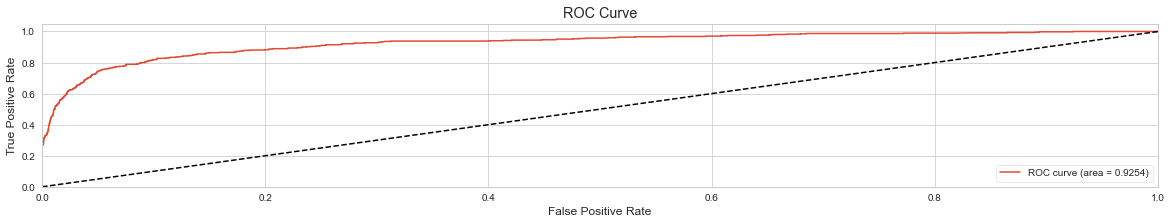

In [241]:
Performance(Model=RF_imp,Y=y_imp_test,X=X_imp_test)

Random forest algorithm was trained on the top 20 features that we selected above and then evaluated the performance of the algorithm on the training and testing sets.
On performing the evaluation we see that AUC & F1-score are almost the same on training & test datasets that shows the model is not overfitting

In [242]:
imp_features

values                colName
0   0.130936         total_og_mou_8
1   0.069175     last_day_rch_amt_8
2   0.057727                 arpu_8
3   0.042485          roam_og_mou_8
4   0.038353  total_rech_amt_8diff7
5   0.032994     av_rech_amt_data_8
6   0.023164         max_rech_amt_8
7   0.021121           loc_ic_mou_8
8   0.020627       loc_ic_t2m_mou_8
9   0.020271    total_ic_mou_8diff7
10  0.018884     roam_og_mou_8diff7
11  0.018755          roam_ic_mou_8
12  0.012092      loc_ic_mou_8diff7
13  0.011637        max_rech_data_8
14  0.010829  loc_ic_t2m_mou_8diff7
15  0.010580            vol_2g_mb_8
16  0.009820       loc_ic_t2t_mou_8
17  0.009692                    aon
18  0.009525           loc_og_mou_8
19  0.008235           std_og_mou_8

### Recommendation for Business

#### Key indicators for identifying the churn customers are as follows

1. Total Recharge amount
2. Incoming & Outgoin calls within the circle
3. Age on the network 
4. Data usage and amount

Recharge amount - The dip was in the action phase is the sign of churn

Incoming & Outgoing calls within the circle - Calls related to incoming and outgoing in the circle is the key for identifying the churn

Age on the network - If aon<500 days and their usage is reduced, then the customer is going to be churned

Data usage and amount - When compared with other months, the usage of the mobile data in the 7th month is reduced. This other feature for identifying the churn
